#### Problem Statement:
1. To build a logistic regression model to assign a lead for an education company named X Education, which can be used by the company to target potential leads. 
2. The model will be able adjust to the changes by the company in future.

# 1. Initializing and Undertanding the data

#### Importing the necessary libraries

In [112]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import scale

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### Importing the dataset

In [113]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Checking the Lead dataframe structure

In [114]:
lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [115]:
lead_df.shape

(9240, 37)

# 2. EDA

#### Checking and dropping null values

In [116]:
total = pd.DataFrame(lead_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_df.isnull().sum()/lead_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


#### Dropping the not required columns from the dataframe

Removing the following columns from the dataset:
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. I agree to pay the amount through cheque
5. Asymmetrique Activity Score
6. Asymmetrique Profile Score
7. Prospect ID
8. What matters most to you in choosing a course
9. How did you hear about X Education

Reason: The above columns are representing either unique values or respective index columns or null values/ 'Select' or have no impact in building the model. 

In [117]:
# Deleting the above mentioned columns

lead_df.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "I agree to pay the amount through cheque", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Prospect ID", "What matters most to you in choosing a course", "How did you hear about X Education"], axis = 1, inplace= True)

In [118]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Tags,Lead Quality,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Interested in other courses,Low in Relevance,No,Select,Select,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Ringing,NaN,No,Select,Select,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Will revert after reading the email,Might be,No,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Ringing,Not Sure,No,Select,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Will revert after reading the email,Might be,No,Select,Mumbai,02.Medium,01.High,No,Modified


In [119]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

#### Observation:
After analysing upto this much, it can be stated that the following columns have the null values:
   1. Lead Source 
   2. TotalVisits
   3. Page Views Per Visit
   4. Last Activity
   5. Country
   6. Specialization
   7. What is your current occupation
   8. Tags
   9. Lead Quality
   10. Lead Profile
   11. City


Out of the above 13 columns, the following have null values more than 35%:

1. Lead Quality
2. Asymmetrique Activity Index		
3. Asymmetrique Profile Index	
4. Tags

Lets, drop them as those are no required. 

In [120]:
lead_df.drop(["Lead Quality", "Asymmetrique Activity Index","Asymmetrique Profile Index","Tags"], axis = 1, inplace= True)

In [121]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [122]:
total = pd.DataFrame(lead_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_df.isnull().sum()/lead_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
Specialization,1438,15.56
City,1420,15.37
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
X Education Forums,0,0.00


#### Observation:
Now all columns have the null values lesser than 35%

There are 9 more columns which have Null values. 
Lets, do clean them by converting them into Null values. 
We will also replace the 'Select' category with 'NA' as it acts same as Null value.

#### Null value Treatment for "Lead Profile"

In [123]:
# Check the different values in "Lead Profile"
lead_df["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [124]:
# Fill the null values with a new catagory named as 'NA'
lead_df["Lead Profile"] = lead_df["Lead Profile"].fillna('NA')

In [125]:
# Fill the 'Select' values with a new catagory named as 'NA'
lead_df["Lead Profile"] = lead_df["Lead Profile"].replace('Select','NA')

In [126]:
# Check the different values in "Lead Profile"
lead_df["Lead Profile"].value_counts()

NA                             6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Null value Treatment for "What is your current occupation"

In [127]:
# Check the different values in "What is your current occupation"
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [128]:
# Fill the null values with a new catagory named as 'NA'
lead_df["What is your current occupation"] = lead_df["What is your current occupation"].fillna('NA')

In [129]:
# Check the different values in "What is your current occupation"
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
NA                      2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Null value treatment for "Country"

In [130]:
# Check the different values in "Country"
lead_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [131]:
# Fill the null values with a new catagory named as 'NA'
lead_df["Country"] = lead_df["Country"].fillna('NA')

In [132]:
# Check the different values in "Country"
lead_df["Country"].value_counts()

India                   6492
NA                      2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Null value treatment for "Specialization"

In [133]:
# Check the different values in "Specialization"
lead_df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [134]:
# Fill the null values with a new catagory named as 'NA'
lead_df["Specialization"] = lead_df["Specialization"].fillna('NA')
# Fill the 'Select' values with a new catagory named as 'NA'
lead_df["Specialization"] = lead_df["Specialization"].replace('Select','NA')

In [135]:
# Check the different values in "Specialization"
lead_df["Specialization"].value_counts()

NA                                   3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Null value treatment for "City"

In [136]:
# Check the different values in "City"
lead_df["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [137]:
# Fill the null values with a new catagory named as 'NA'
lead_df["City"] = lead_df["City"].fillna('NA')
# Fill the 'Select' values with a new catagory named as 'NA'
lead_df["City"] = lead_df["City"].replace('Select','NA')

In [138]:
# Check the different values in "City"
lead_df["City"].value_counts()

NA                             3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Null value treatment for "TotalVisits"

In [139]:
# Check the different values in "TotalVisits"
lead_df["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

#### Null value treatment for "Page Views Per Visit"

In [140]:
# Check the different values in "Page Views Per Visit"
lead_df["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

#### Null value treatment for "Last Activity"

In [141]:
# Check the different values in "Last Activity"
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [142]:
# Fill the null values with a new catagory named as 'NA'
lead_df["Last Activity"] = lead_df["Last Activity"].fillna('NA')
# Check the different values in "Last Activity"
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NA                               103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Null value treatment for "Lead Source"

In [143]:
# Check the different values in "Lead Source"
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [144]:
# Fill the null values with a new catagory named as 'NA'
lead_df["Lead Source"] = lead_df["Lead Source"].fillna('NA')
# Check the different values in "Lead Source"
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NA                     36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Inference:
All the Null values and the 'Select' category of catagoric variables have been converted into 'NA'.

In [145]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Country                                 9240 non-null   obje

In [146]:
# Dropping the rows with null values for remaining numeric variables
lead_df = lead_df[lead_df.isnull().sum(axis=1) <1]

In [147]:
# Checking for null values
total = pd.DataFrame(lead_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_df.isnull().sum()/lead_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Number,0,0.0
Lead Origin,0,0.0
A free copy of Mastering The Interview,0,0.0
City,0,0.0
Lead Profile,0,0.0
Get updates on DM Content,0,0.0
Through Recommendations,0,0.0
Digital Advertisement,0,0.0
Newspaper,0,0.0
X Education Forums,0,0.0


#### Checking if there is any correlation

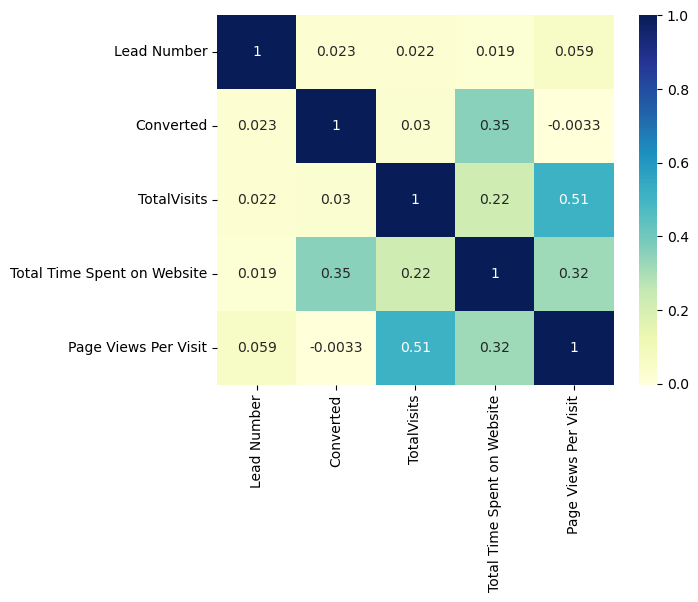

In [148]:
sns.heatmap(lead_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Univariate Analysis

Text(0.5, 1.0, 'Lead Origin')

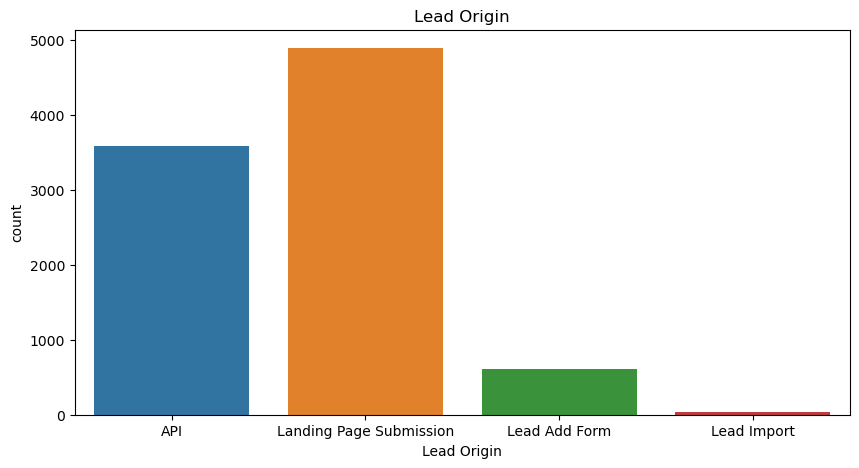

In [149]:
# Count plot for 'Lead Origin'
plt.figure(figsize = (10,5))
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

#### Observation
From the above plot we can observe that the count of 'Landing Page Submission' is very high.

Text(0.5, 1.0, 'Search')

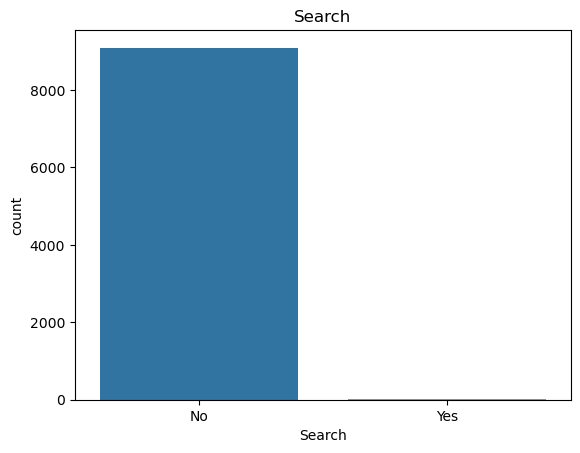

In [150]:
# Count plot for 'Search'
sns.countplot(lead_df['Search'])
plt.title('Search')

#### Observation
From the above plot we can observe that for 'Search' category No is dominant.

Text(0.5, 1.0, 'Newspaper Article')

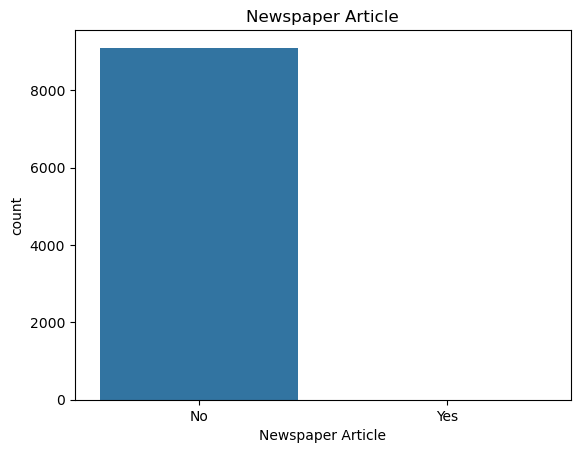

In [151]:
# Count plot for 'Newspaper Article'
sns.countplot(lead_df['Newspaper Article'])
plt.title('Newspaper Article')

#### Observation
From the above plot we can observe that in the category 'Newspaper Article' there is only No.

Text(0.5, 1.0, 'Newspaper')

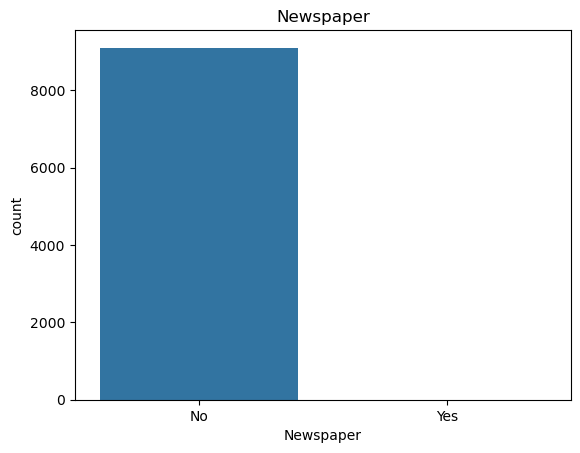

In [152]:
# Count plot for 'Newspaper'
sns.countplot(lead_df['Newspaper'])
plt.title('Newspaper')

#### Observation
From the above plot we can say that in the category 'Newspaper' there is only No.

Text(0.5, 1.0, 'Digital Advertisement')

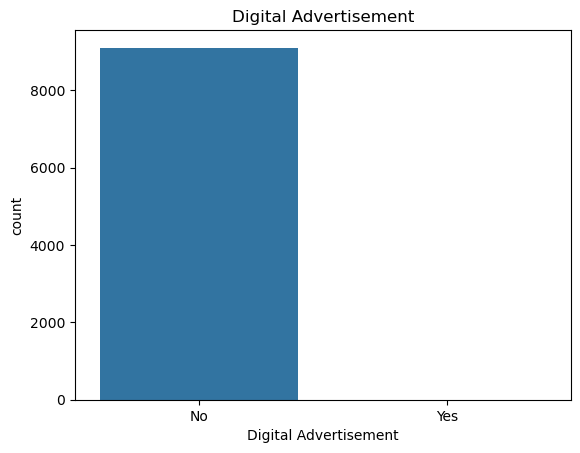

In [153]:
# Count plot for 'Digital Advertisement'
sns.countplot(lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

#### Observation
From the above plot we can observe that in the category 'Digital Advertisement' there is only No.

Text(0.5, 1.0, 'Through Recommendations')

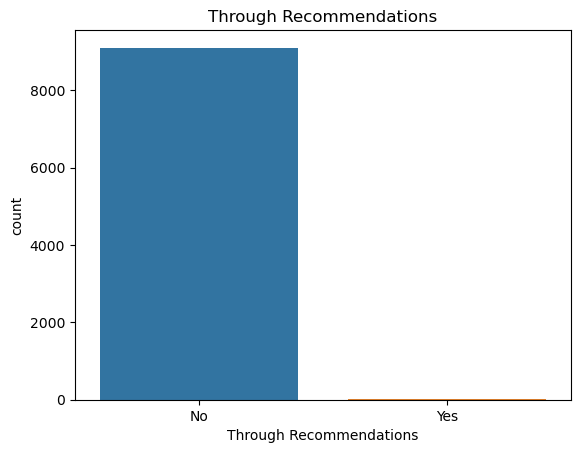

In [154]:
# Count plot for 'Through Recommendations'
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

Text(0.5, 1.0, 'Get updates on DM Content')

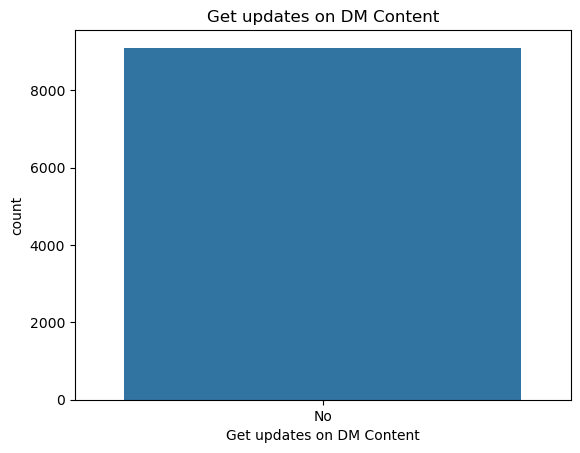

In [155]:
# Count plot for 'Get updates on DM Content'
sns.countplot(lead_df['Get updates on DM Content'])
plt.title('Get updates on DM Content')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

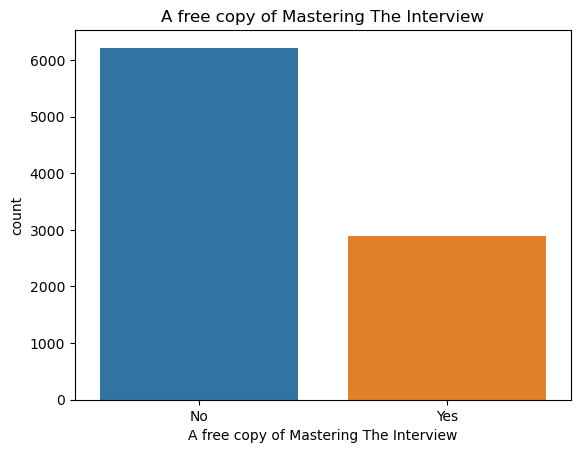

In [156]:
# Count plot for 'A free copy of Mastering The Interview'
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

#### Observation
In the above plot we can see that the number of No is significantly high that Yes.

Text(0.5, 1.0, 'X Education Forums')

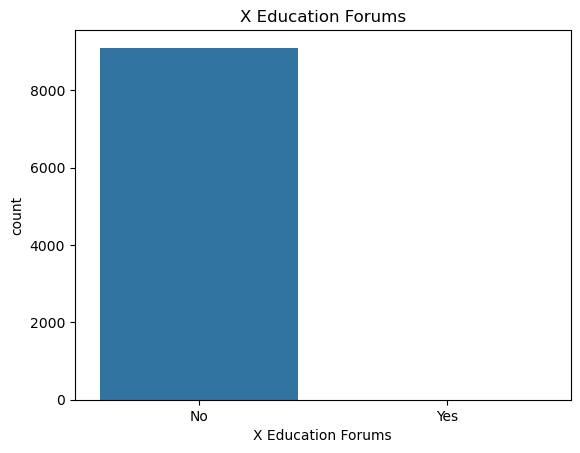

In [157]:
# Count plot for 'X Education Forums'
sns.countplot(lead_df['X Education Forums'])
plt.title('X Education Forums')

Text(0.5, 1.0, 'Lead Source')

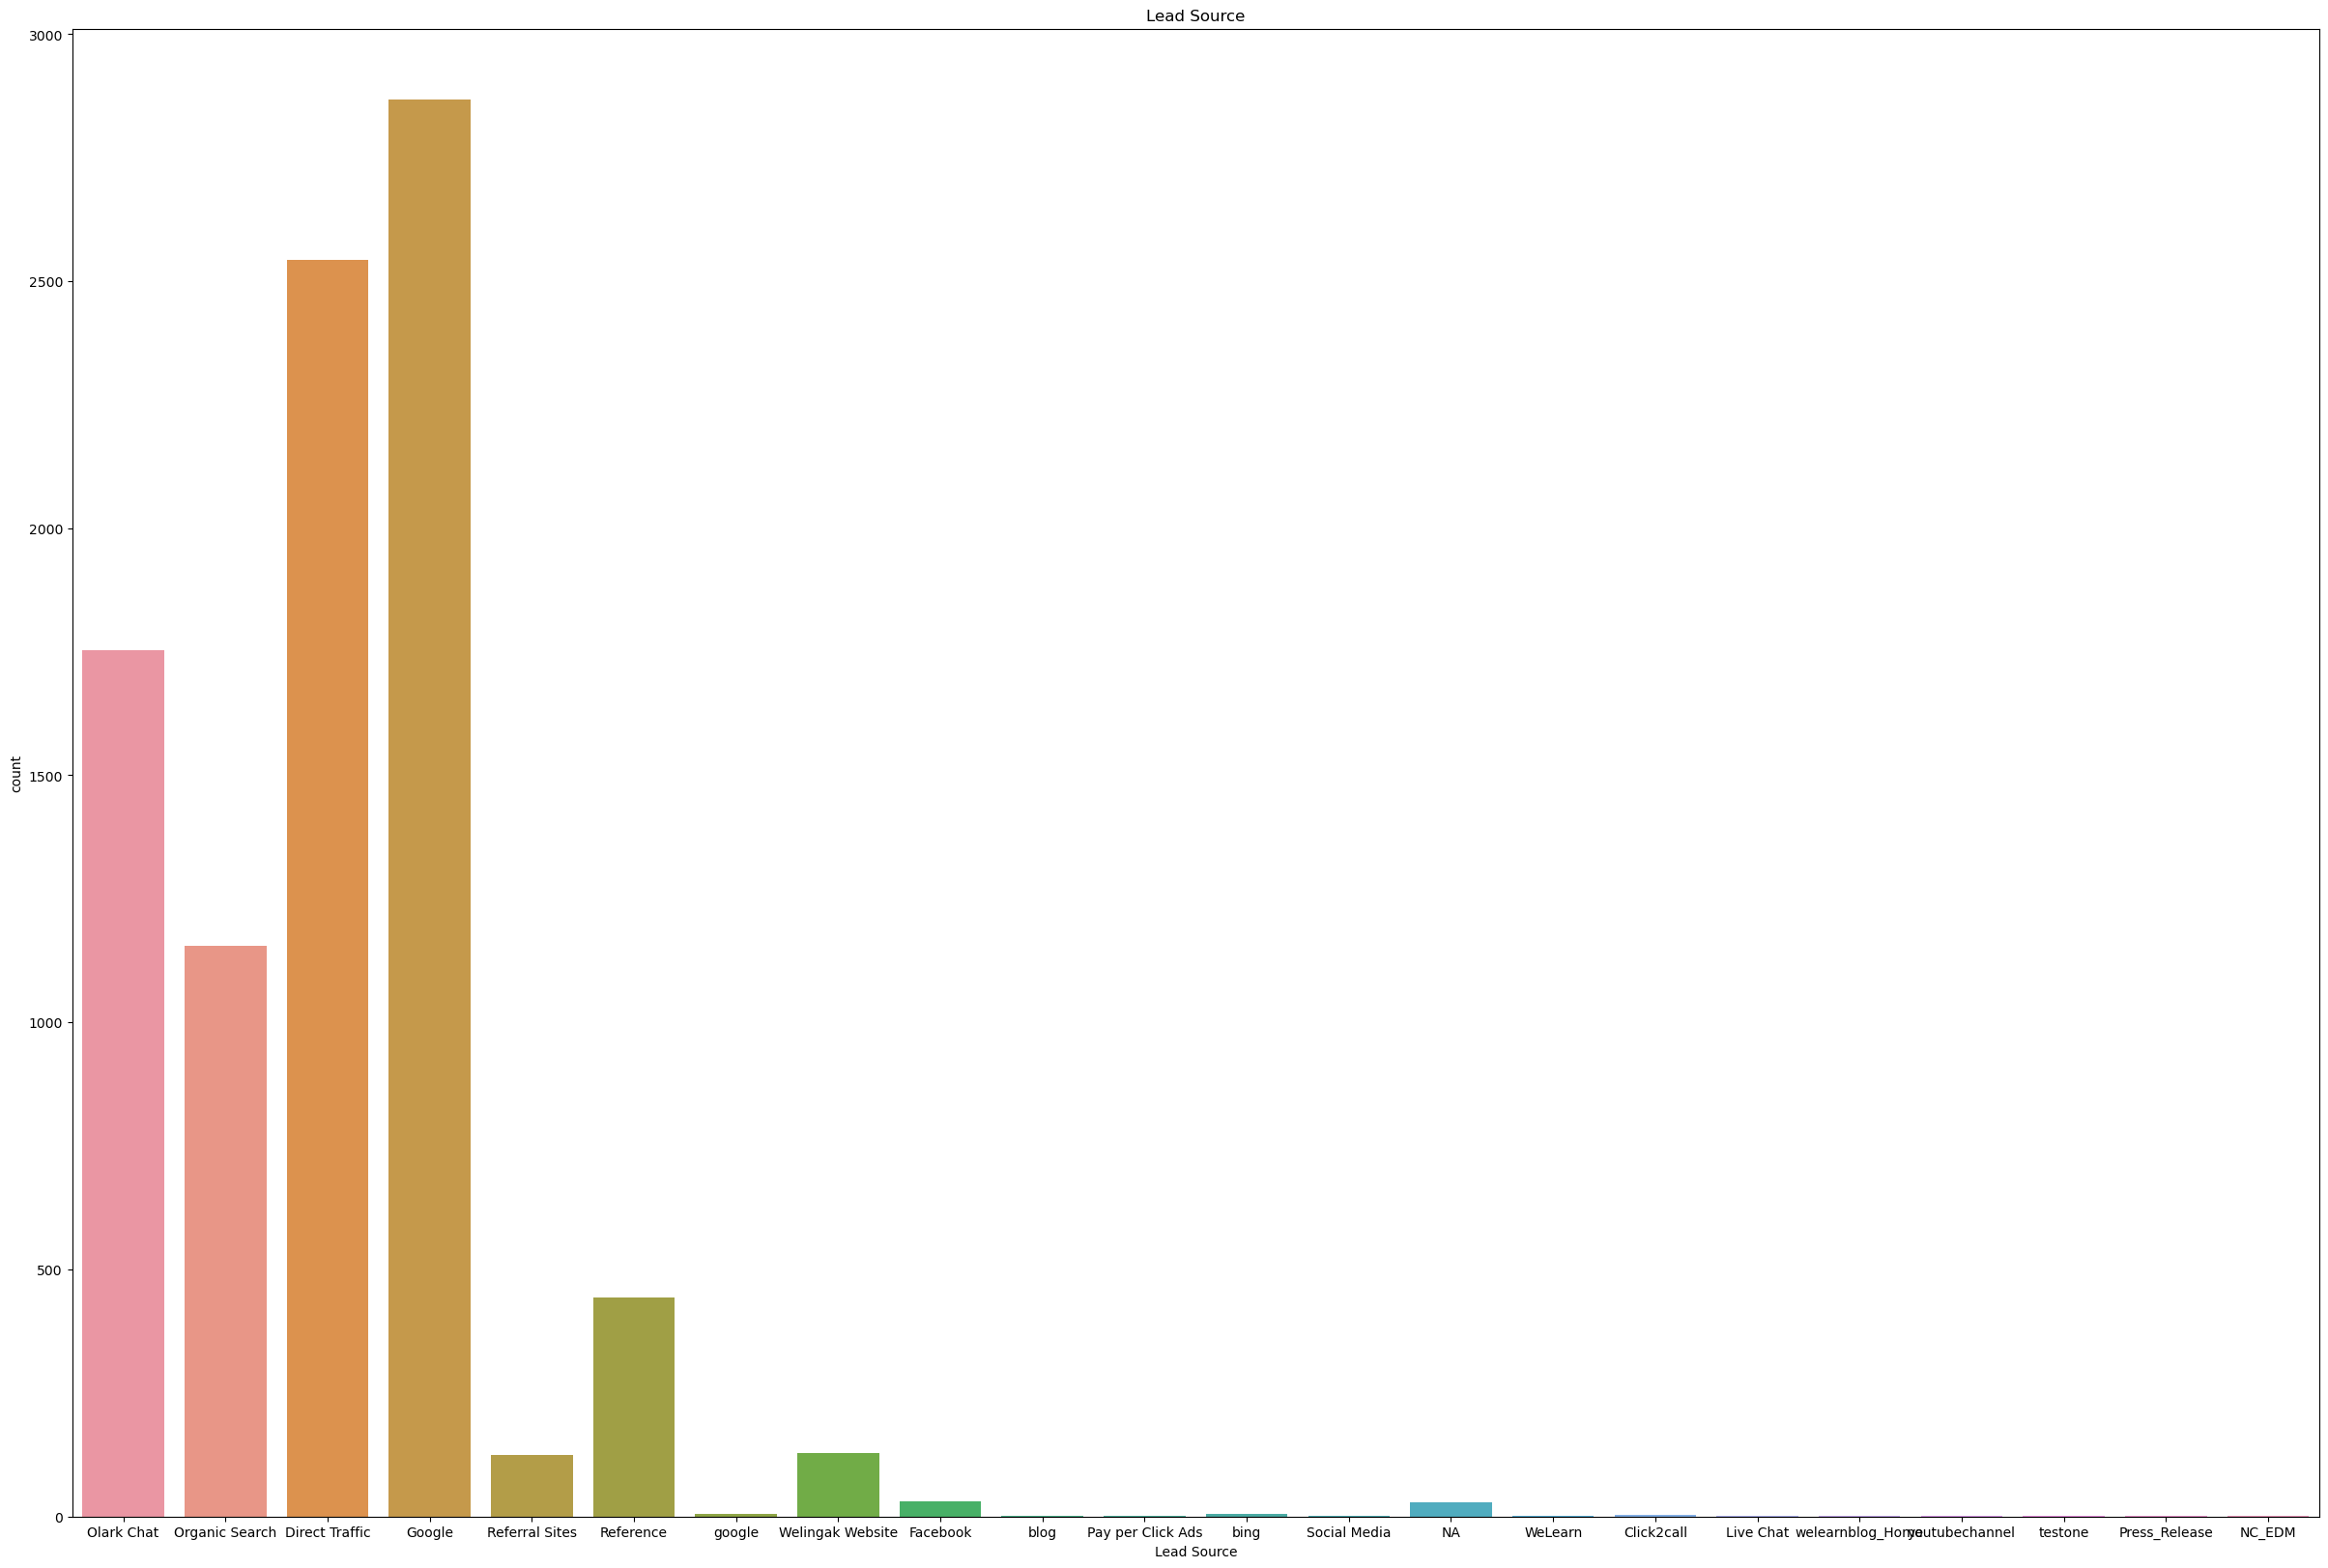

In [158]:
# Count plot for 'Lead Source'
plt.figure(figsize=(30,20))
sns.countplot(lead_df['Lead Source'])
plt.title('Lead Source')

#### Observation
In the above plot Google has the highest count.

Text(0.5, 1.0, 'Last Activity')

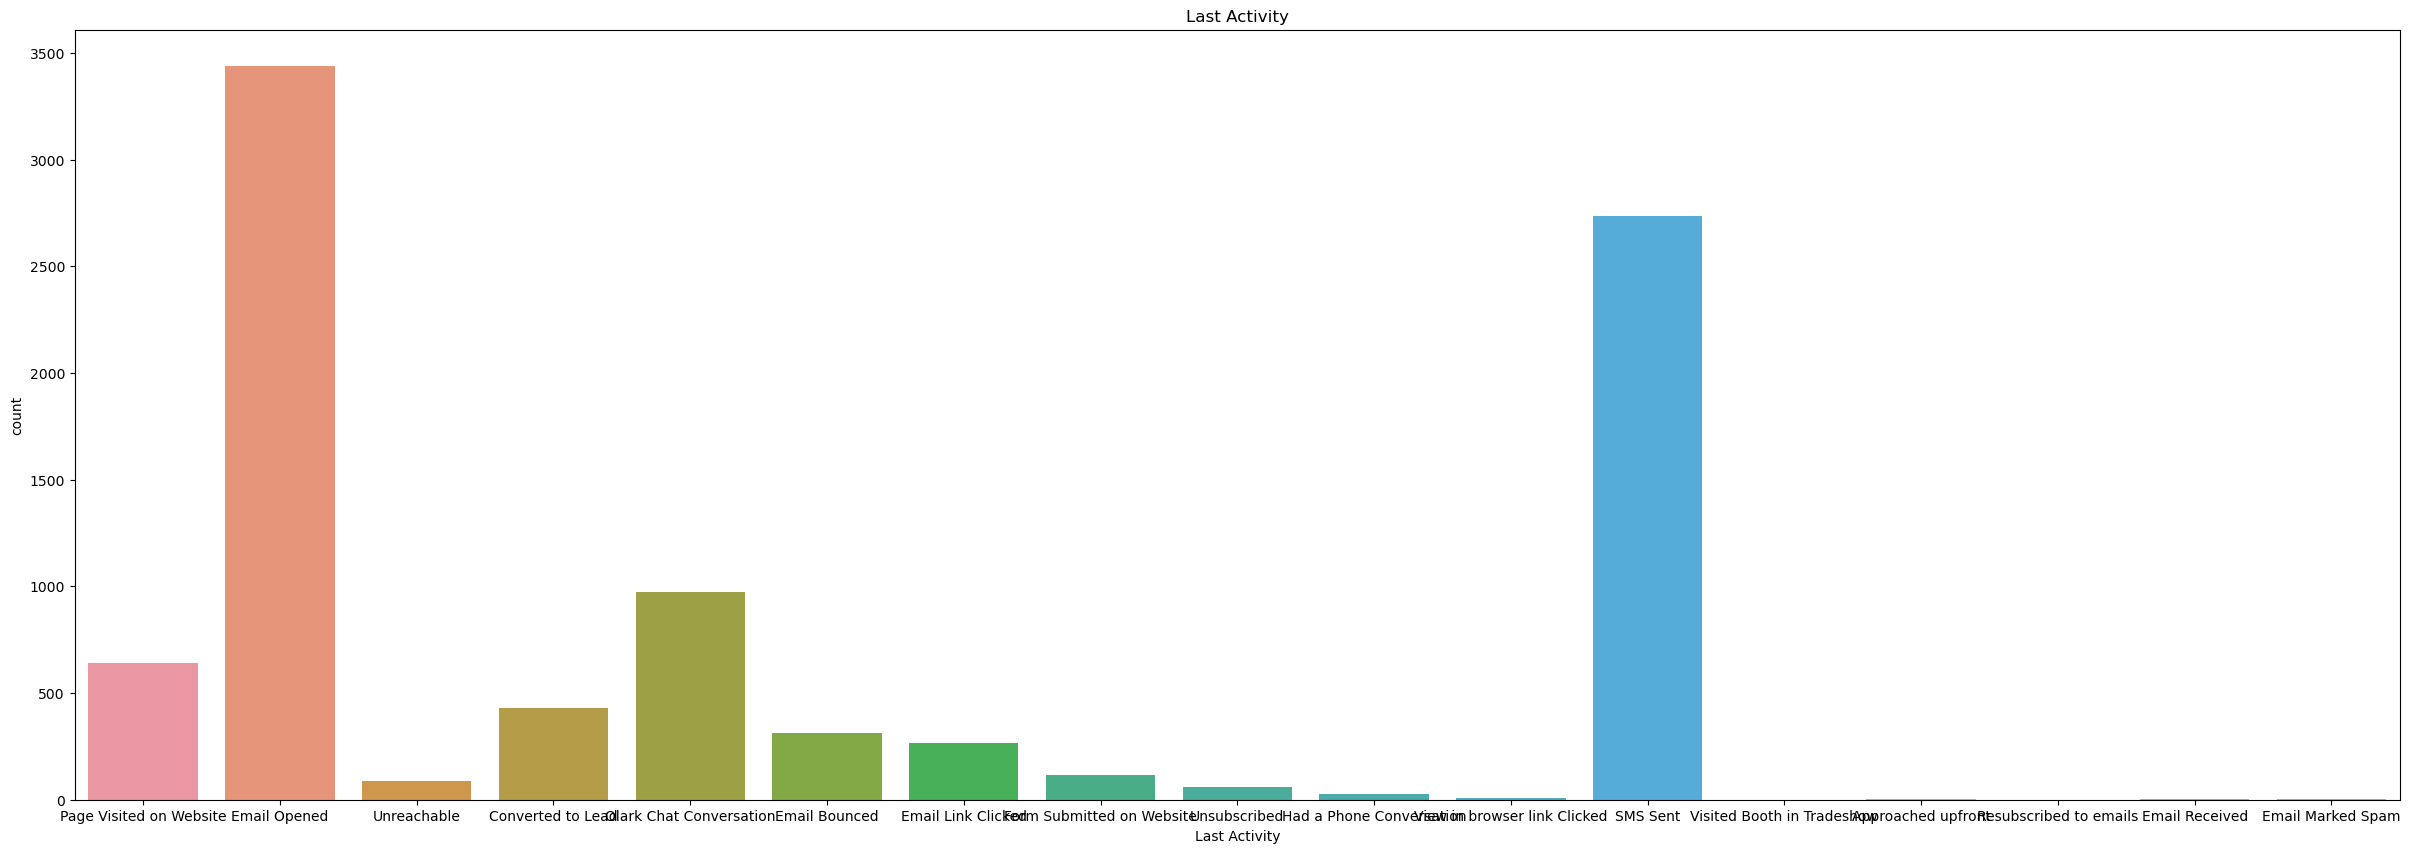

In [159]:
# Count plot for 'Last Activity'
plt.figure(figsize=(30,10))
sns.countplot(lead_df['Last Activity'])
plt.title('Last Activity')

#### Observation
In the above plot the Email opened has the highest count.

Text(0.5, 1.0, 'Page Views Per Visit')

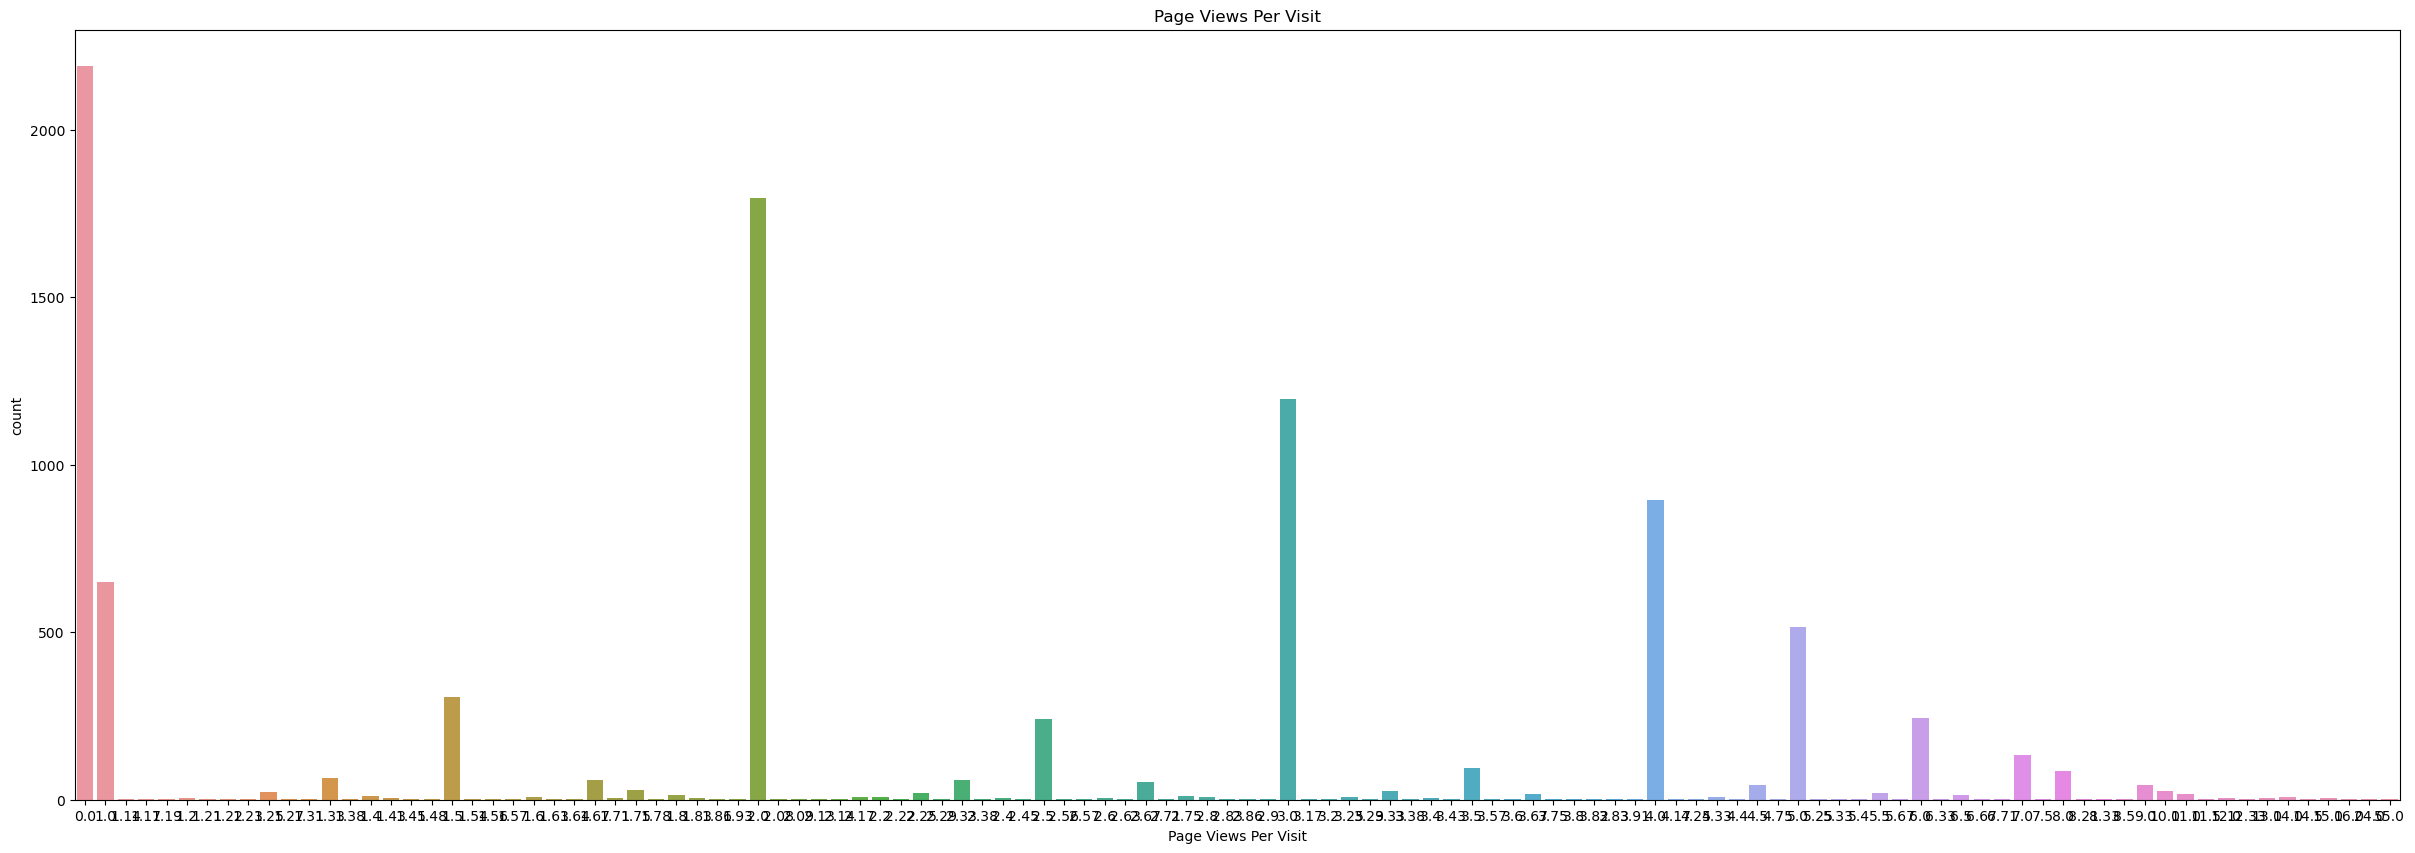

In [160]:
# Count plot for 'Page Views Per Visit'
plt.figure(figsize=(30,10))
sns.countplot(lead_df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

#### Observation
In the above plot the 0.01 has the highest count.

Text(0.5, 1.0, 'TotalVisits')

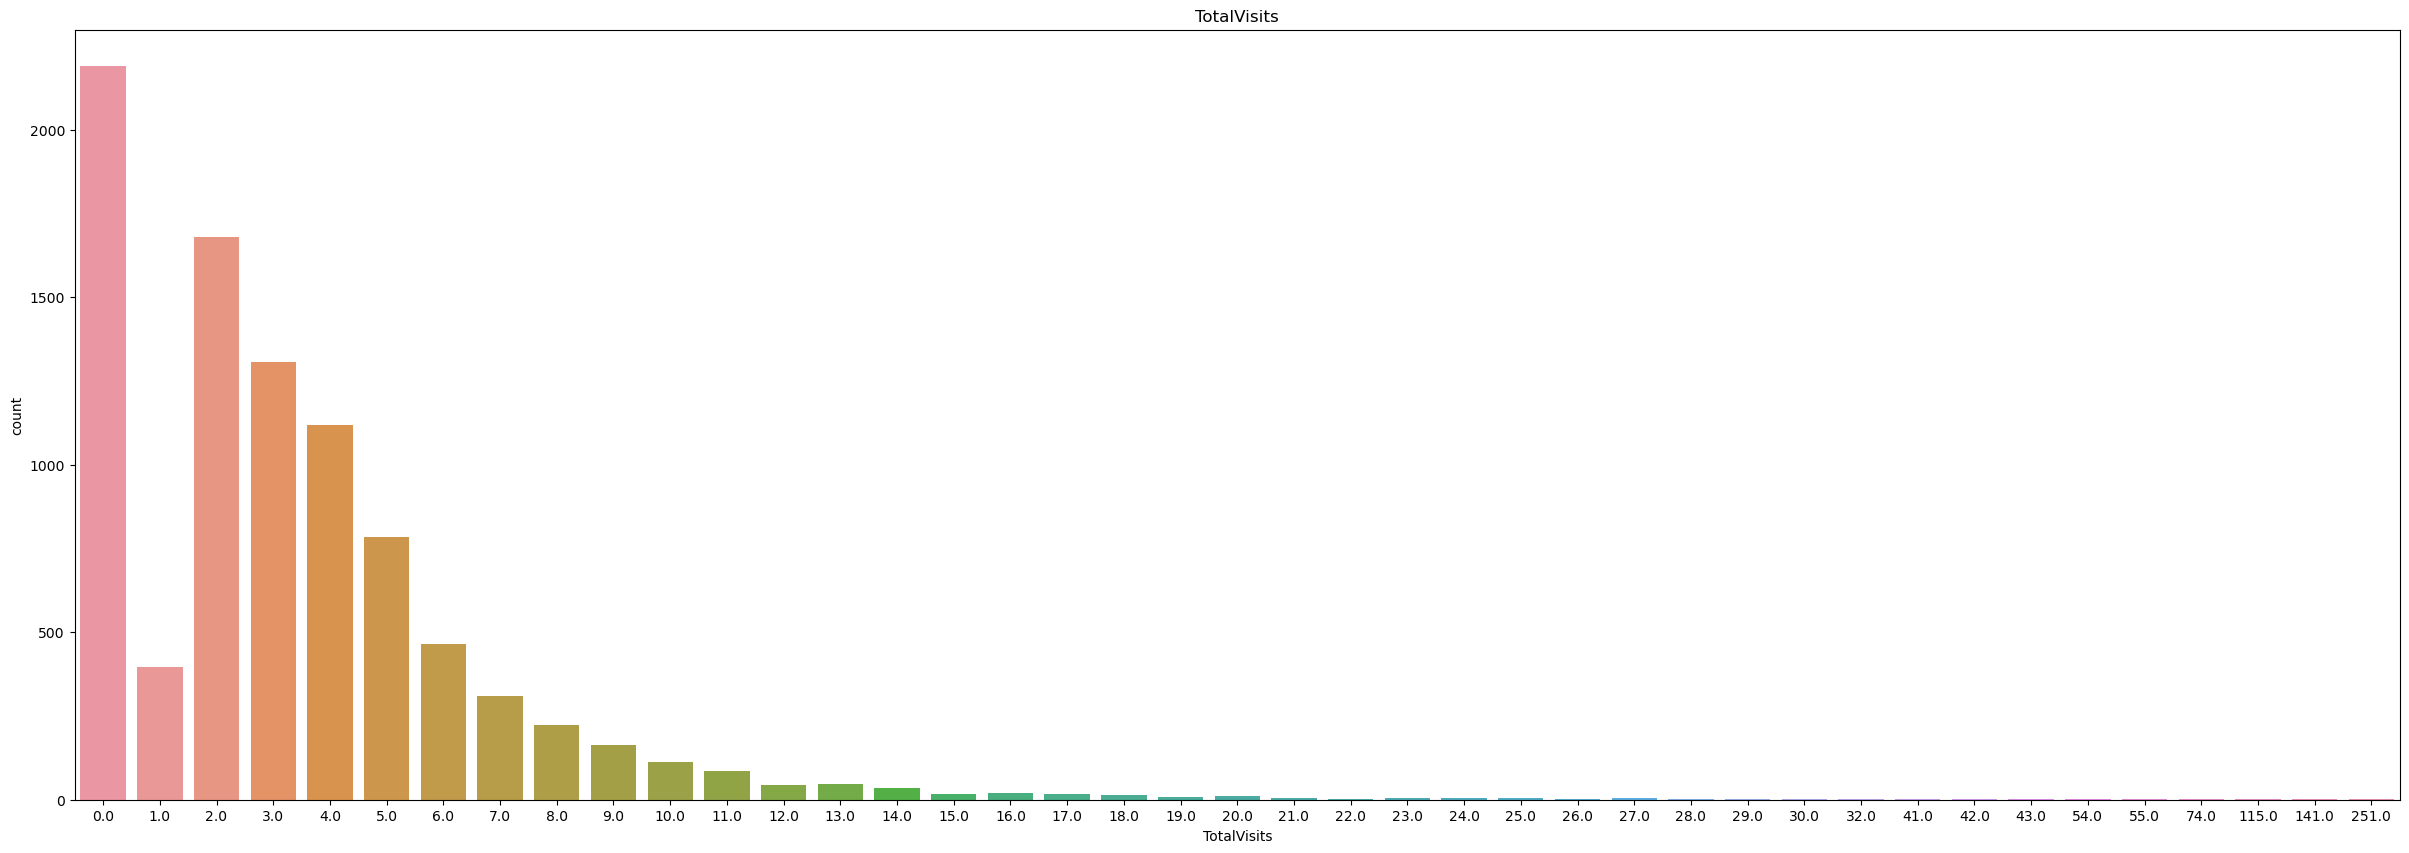

In [161]:
# Count plot for 'TotalVisits'
plt.figure(figsize=(30,10))
sns.countplot(lead_df['TotalVisits'])
plt.title('TotalVisits')

Text(0.5, 1.0, 'City')

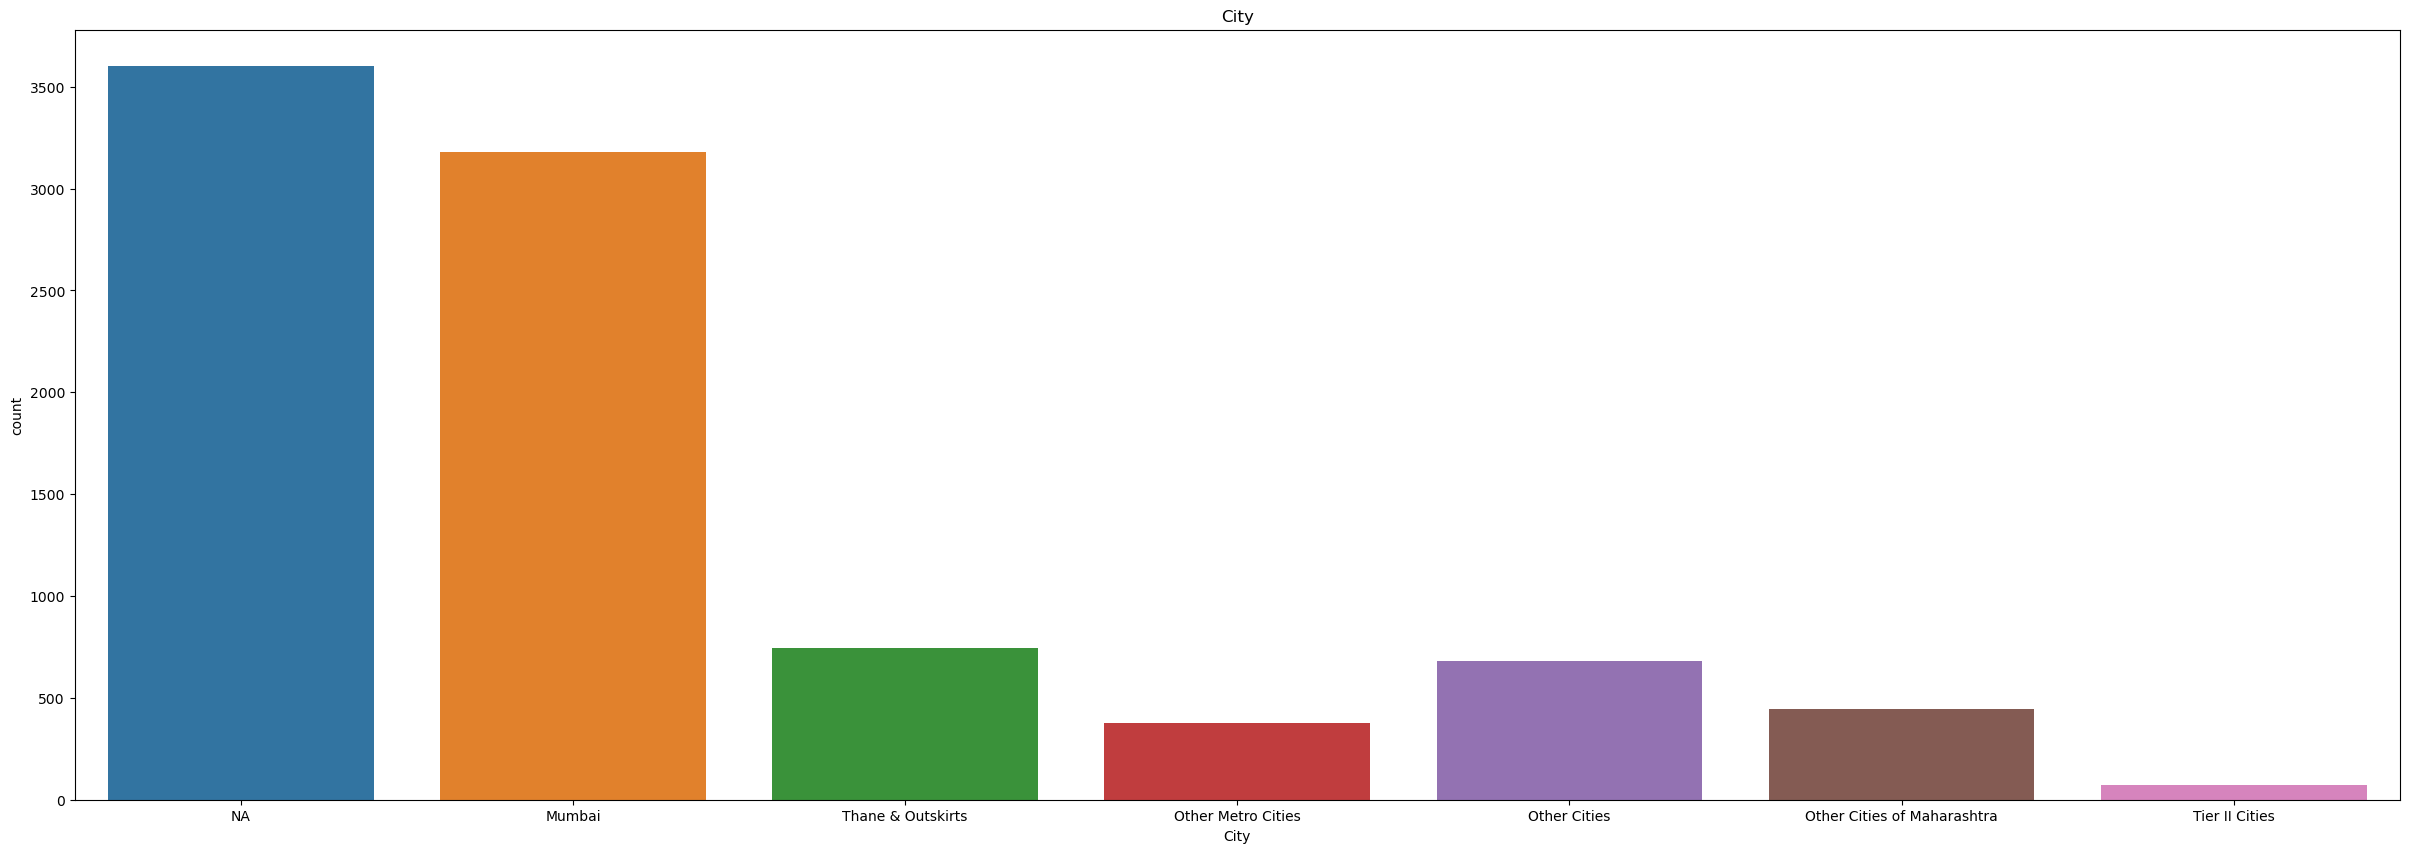

In [162]:
# Count plot for 'City'
plt.figure(figsize=(30,10))
sns.countplot(lead_df['City'])
plt.title('City')

#### Observation
In the above plot, majority of the data is missing and Mumbai have the second highest count.

Text(0.5, 1.0, 'Specialization')

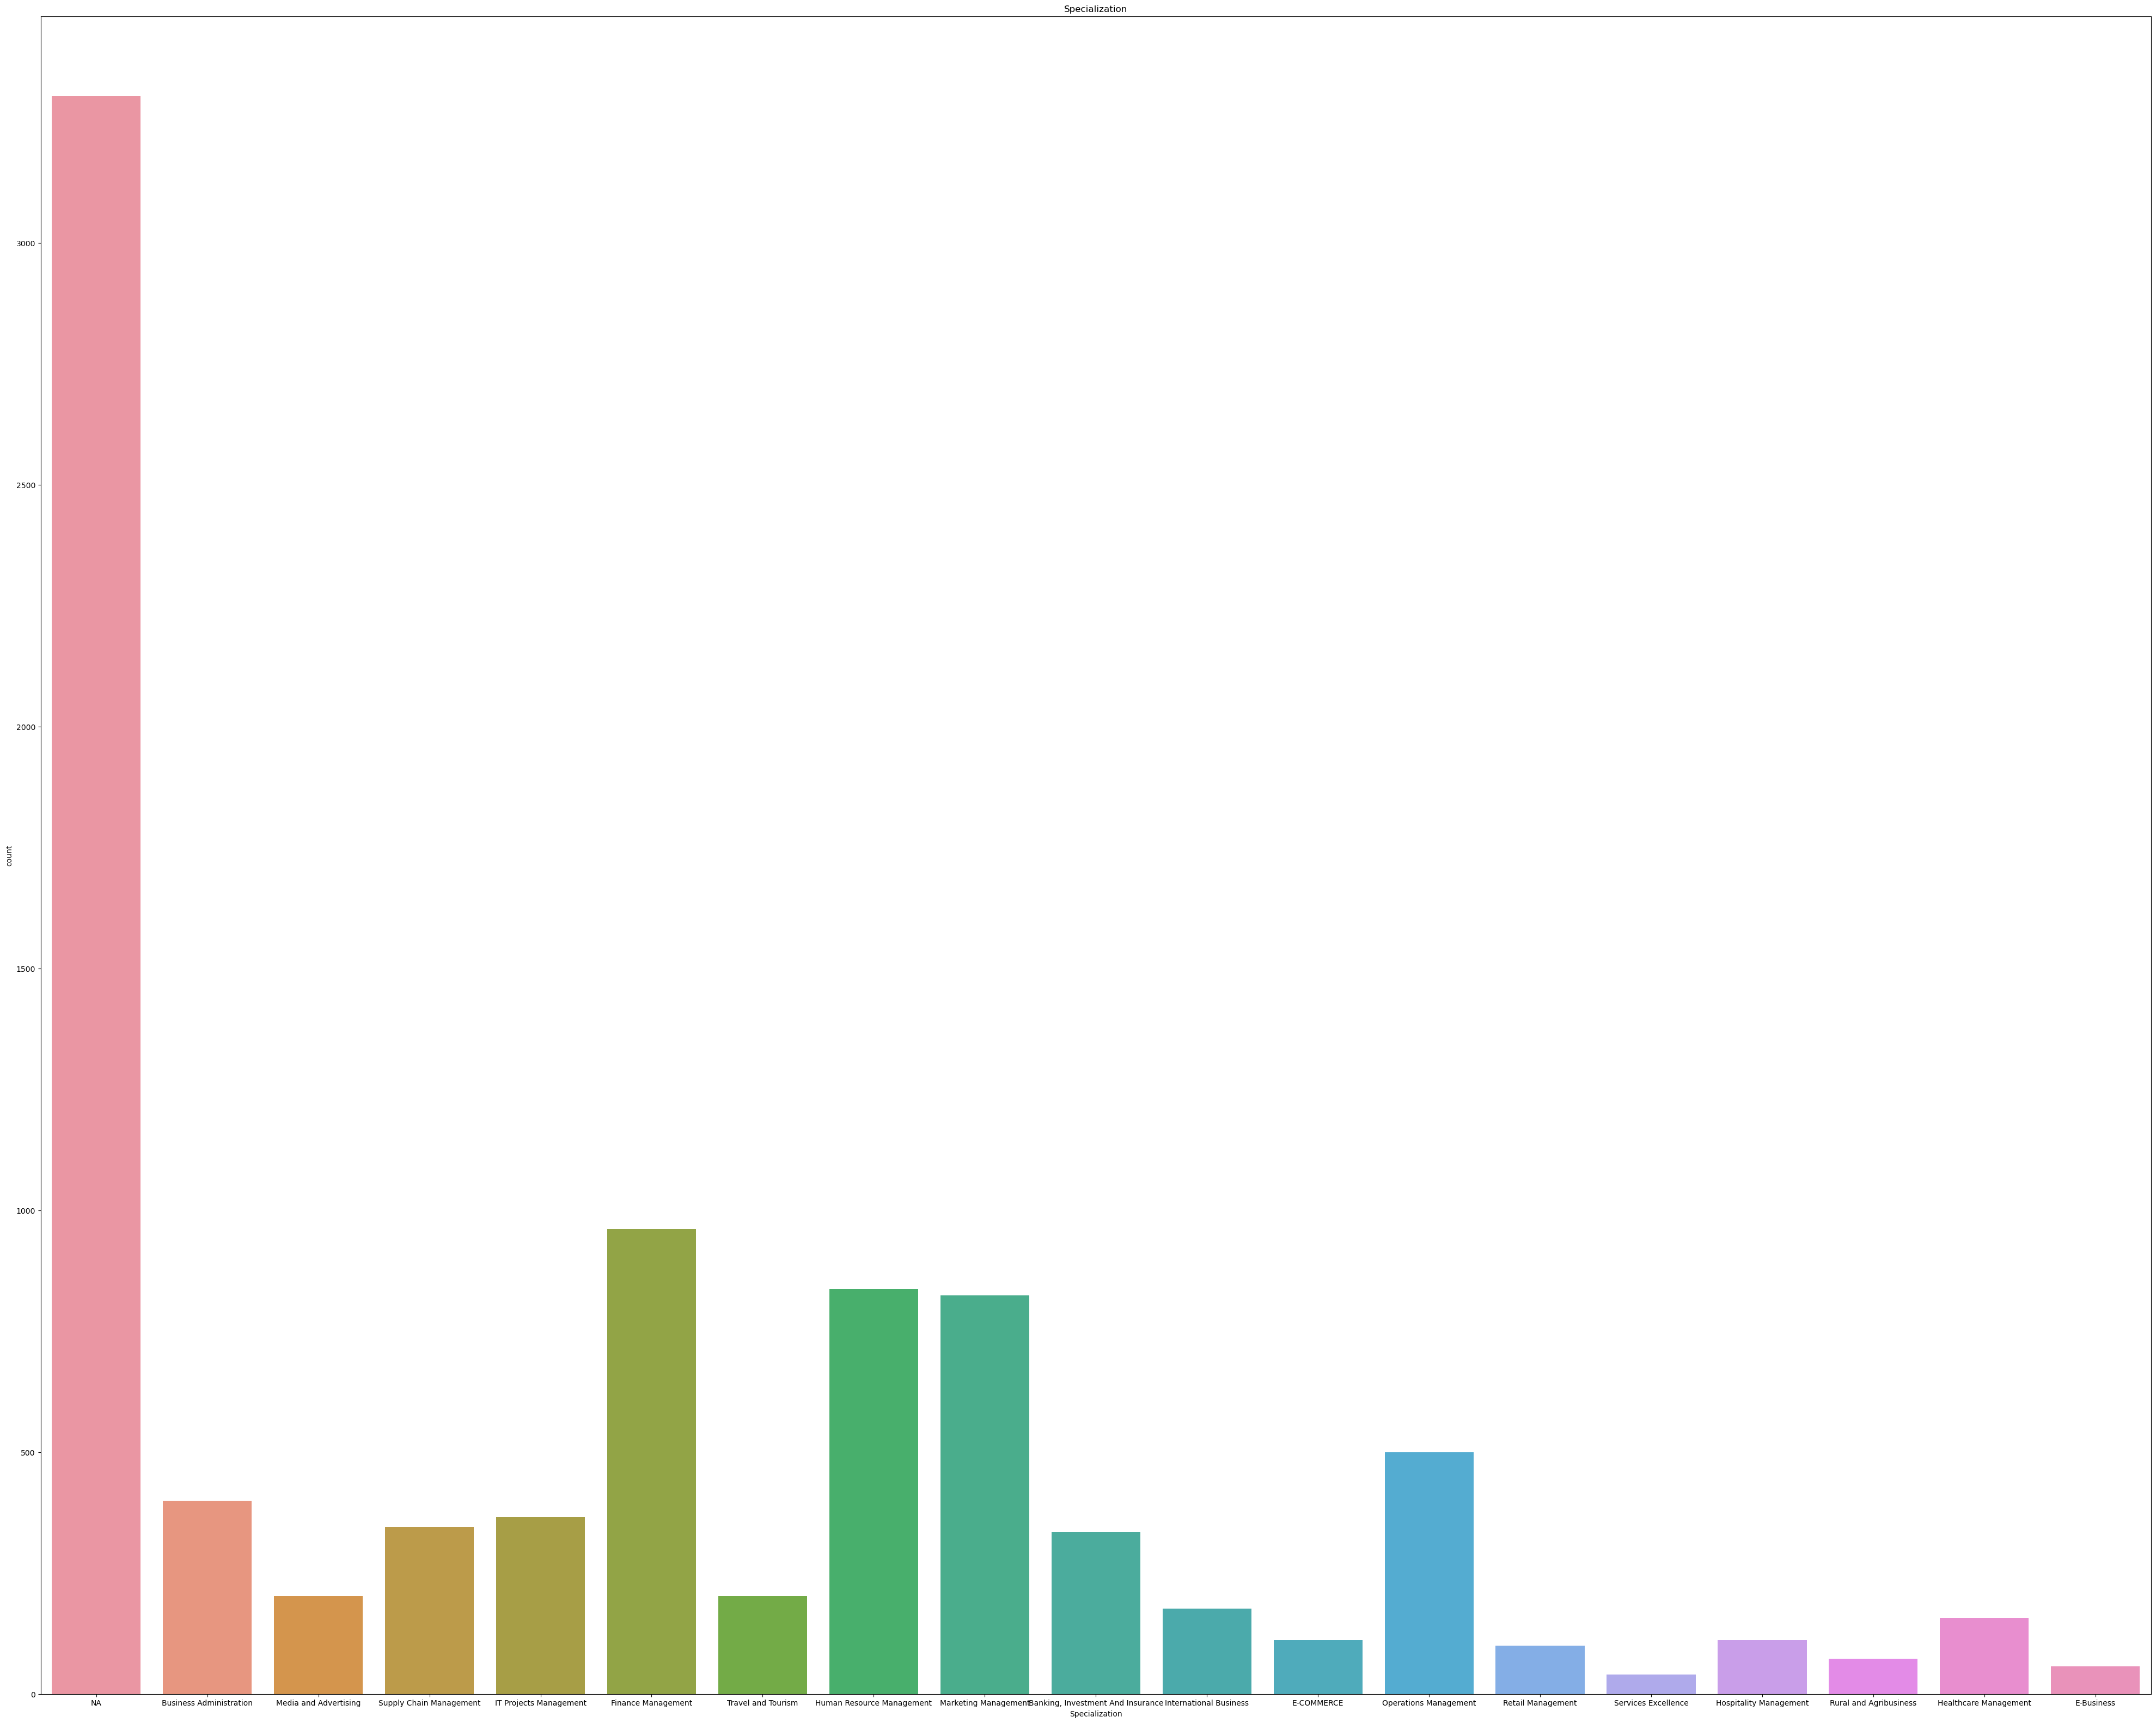

In [163]:
# Count plot for 'Specialization'
plt.figure(figsize=(50,40))
sns.countplot(lead_df['Specialization'])
plt.title('Specialization')

Text(0.5, 1.0, 'Country')

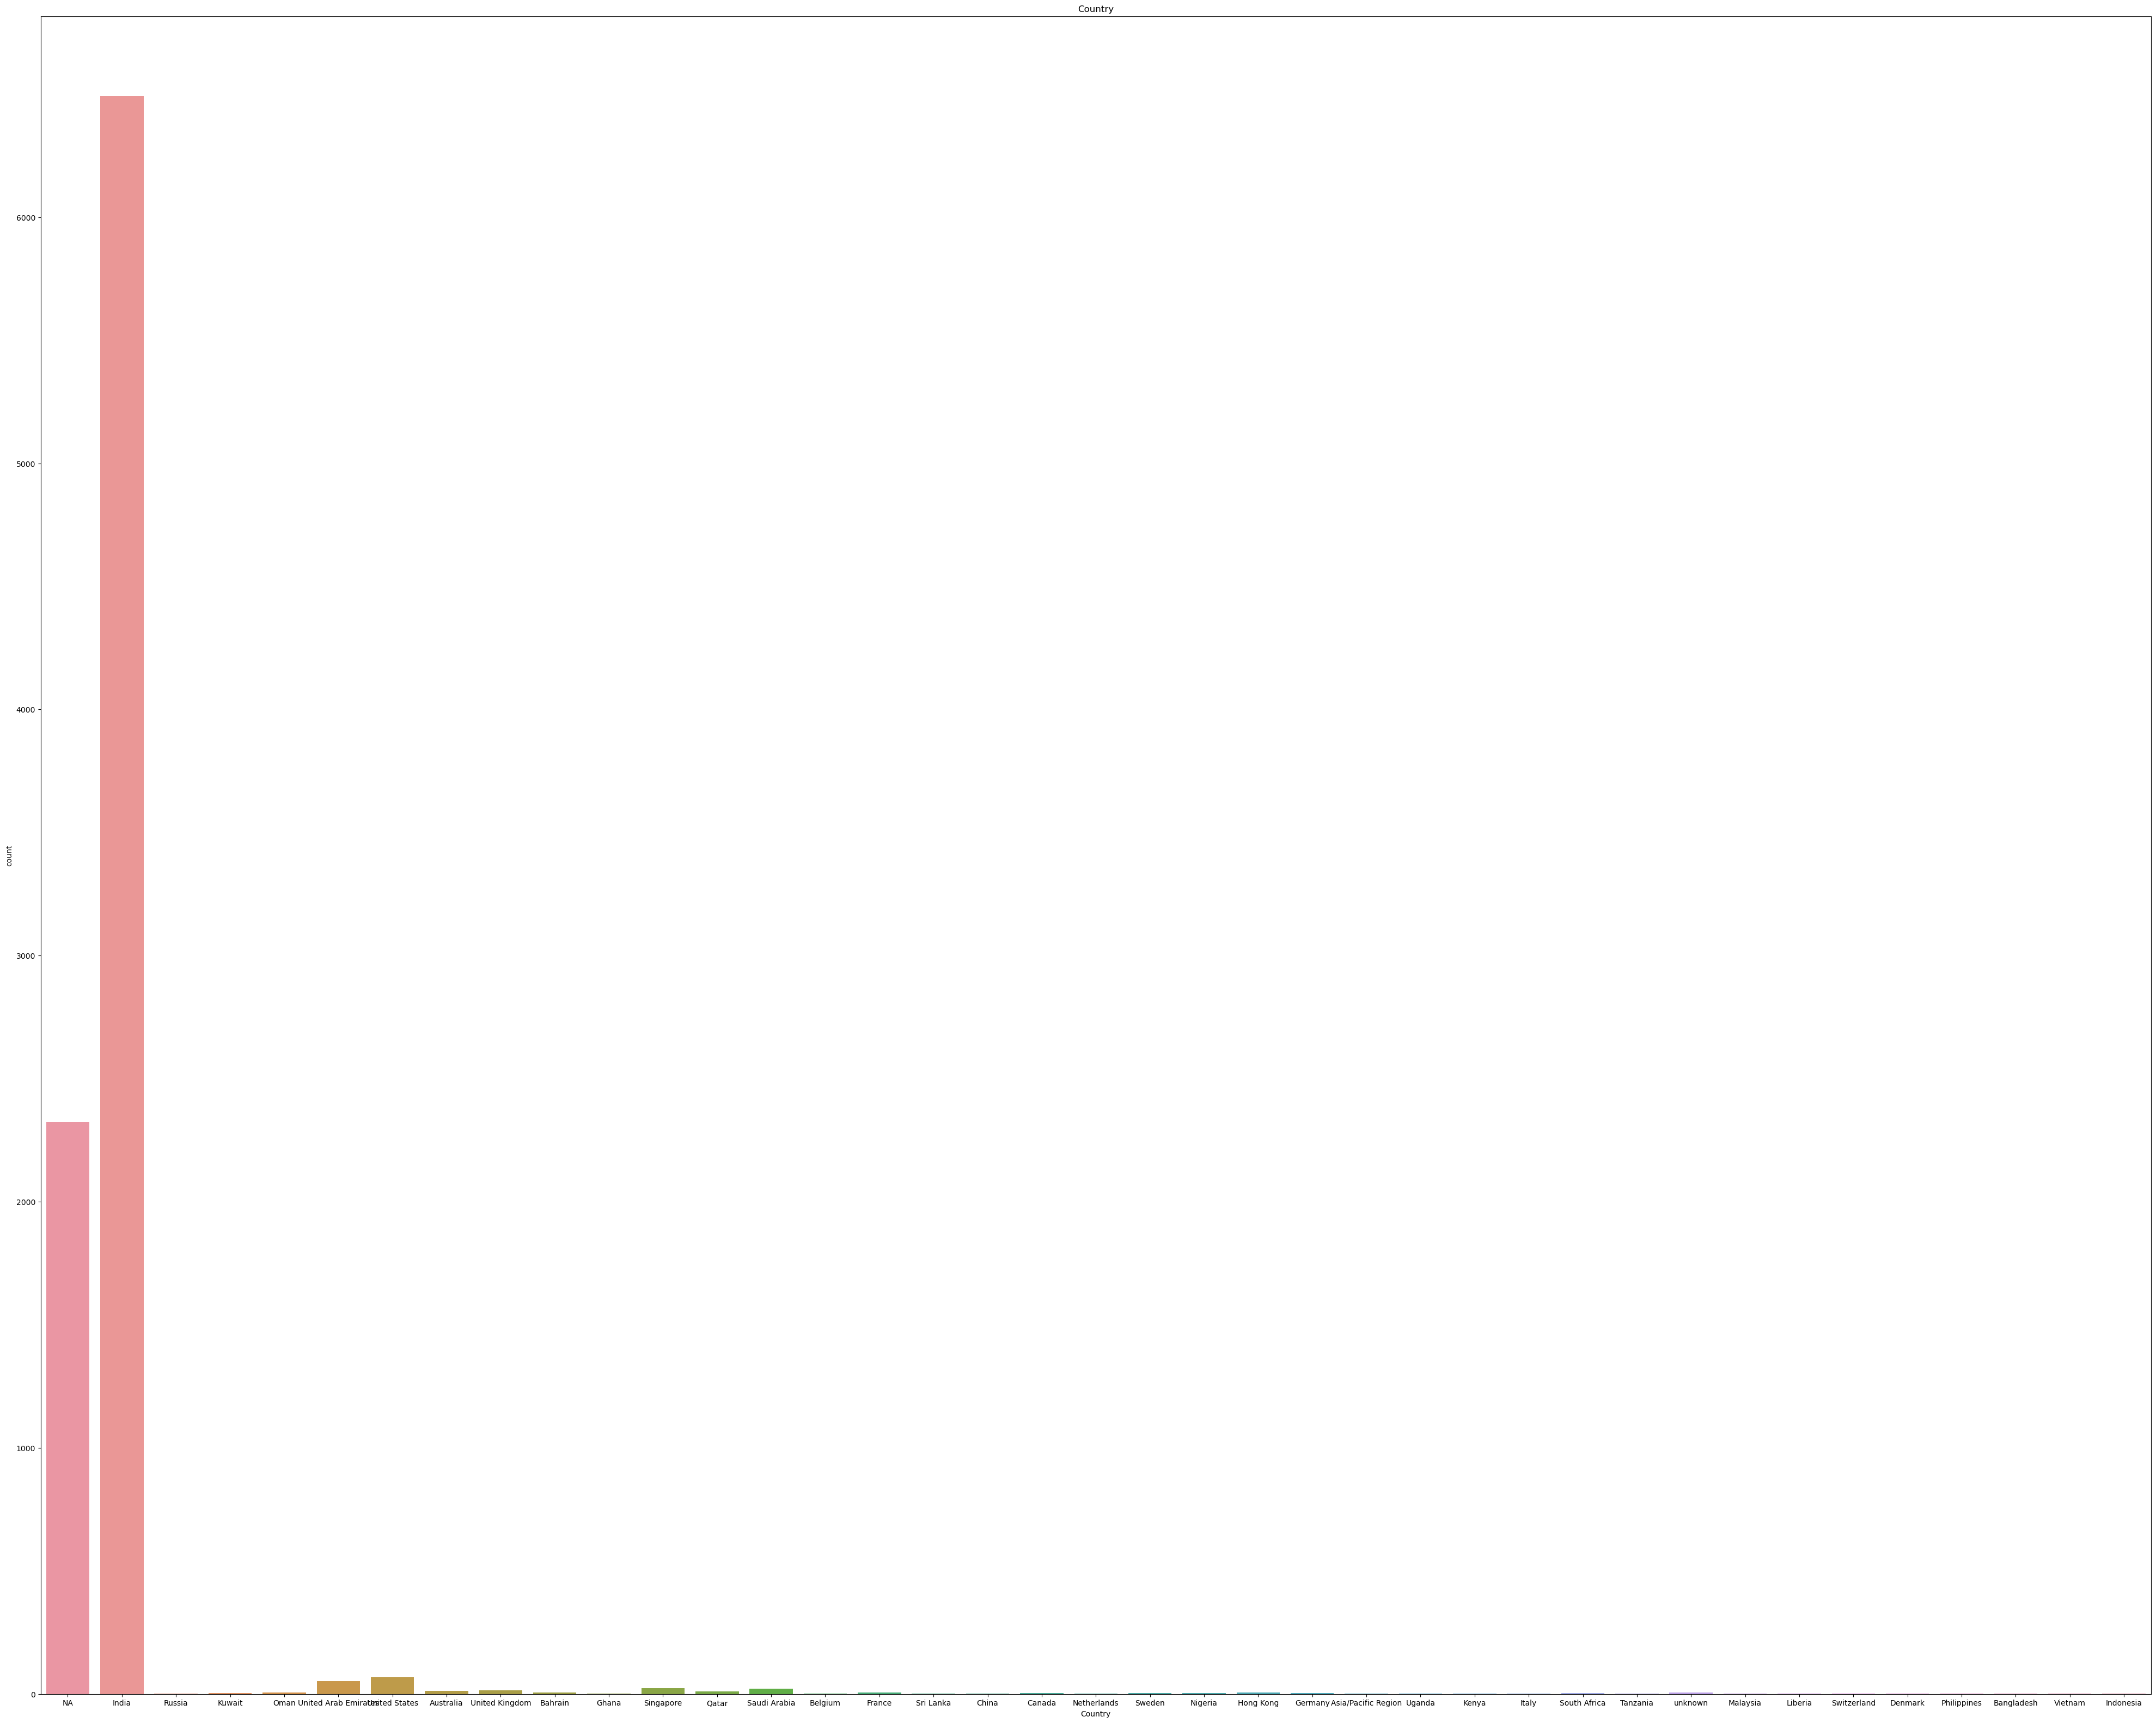

In [164]:
# Count plot for 'Country'
plt.figure(figsize=(50,40))
sns.countplot(lead_df['Country'])
plt.title('Country')

#### Observation
In the above plot we can see that India has the highest count.

Text(0.5, 1.0, 'What is your current occupation')

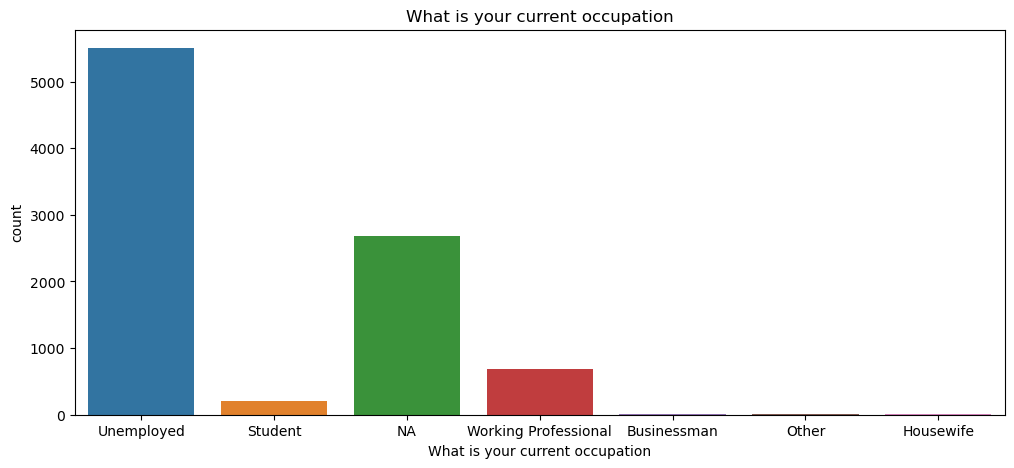

In [165]:
# Count plot for 'What is your current occupation'
plt.figure(figsize = (12,5))
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation')

#### Observation
In the above plot the count of Unemployed is highest.

Text(0.5, 1.0, 'Lead Profile')

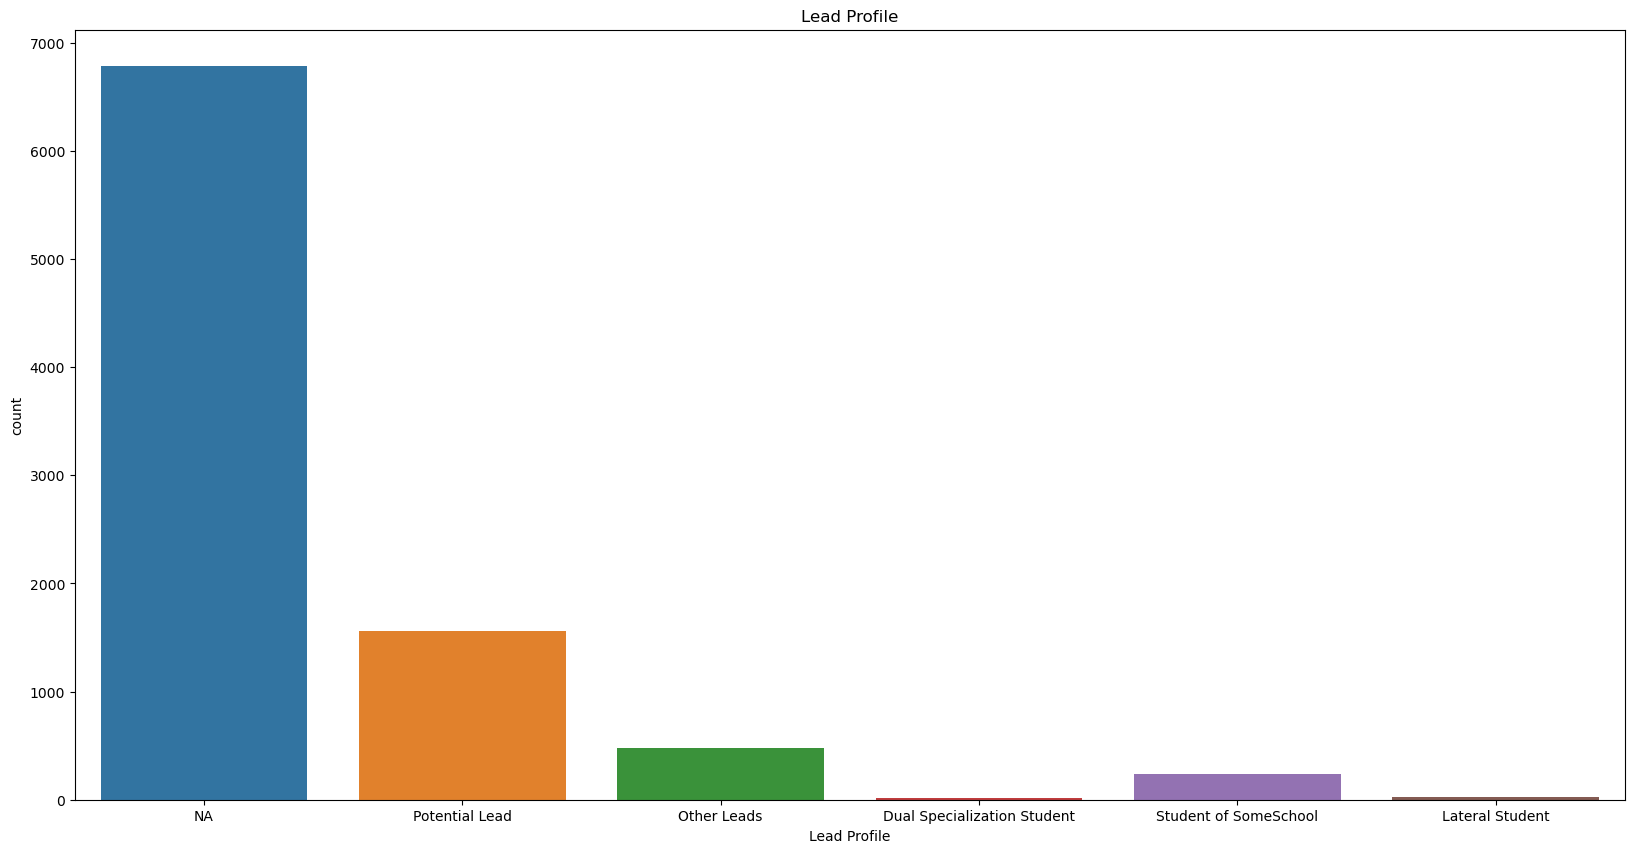

In [166]:
# Count plot for 'Lead Profile'
plt.figure(figsize=(20,10))
sns.countplot(lead_df['Lead Profile'])
plt.title('Lead Profile')

#### Observation
From tha above plot we can see that majority data is not available.

#### Bivariate Analysis

#### As per the problem, we will take target variable as 'Converted'.

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

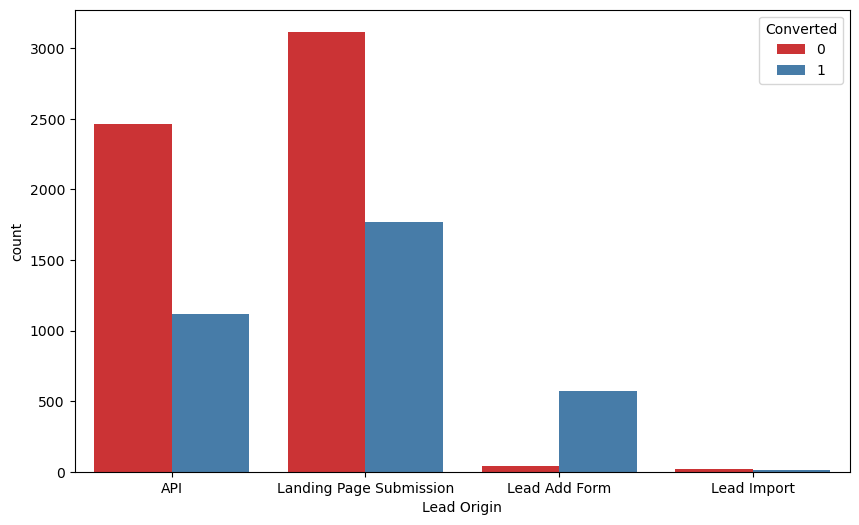

In [167]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The ones have reached Landing Page Submission are converted more than others.

<AxesSubplot:xlabel='Search', ylabel='count'>

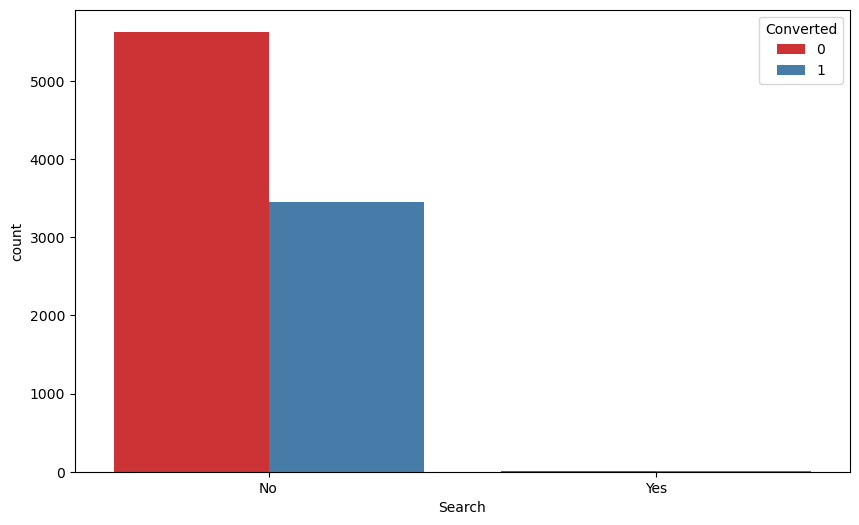

In [168]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Search", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The Nos are more likely to get converted than Yes'.

<AxesSubplot:xlabel='Newspaper Article', ylabel='count'>

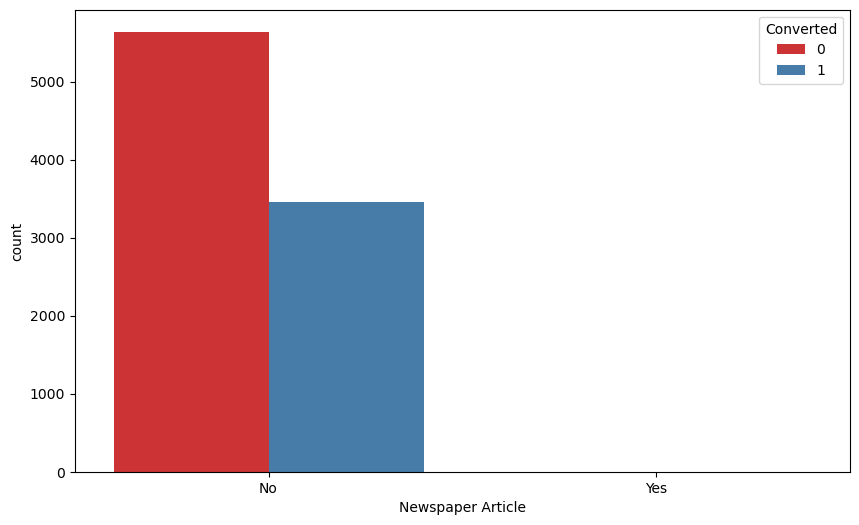

In [169]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
Here we can see that number of getting converted is much lower.

<AxesSubplot:xlabel='Newspaper', ylabel='count'>

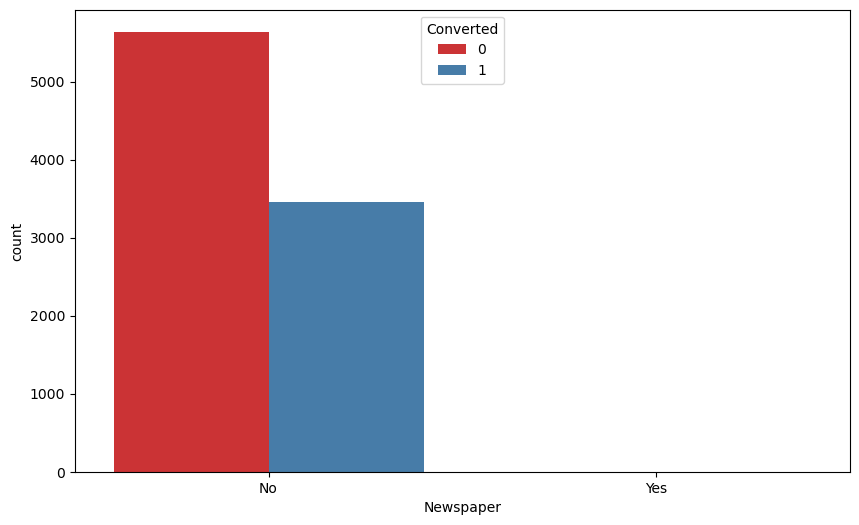

In [170]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The targeted people are more likely to not getting converted.

<AxesSubplot:xlabel='Digital Advertisement', ylabel='count'>

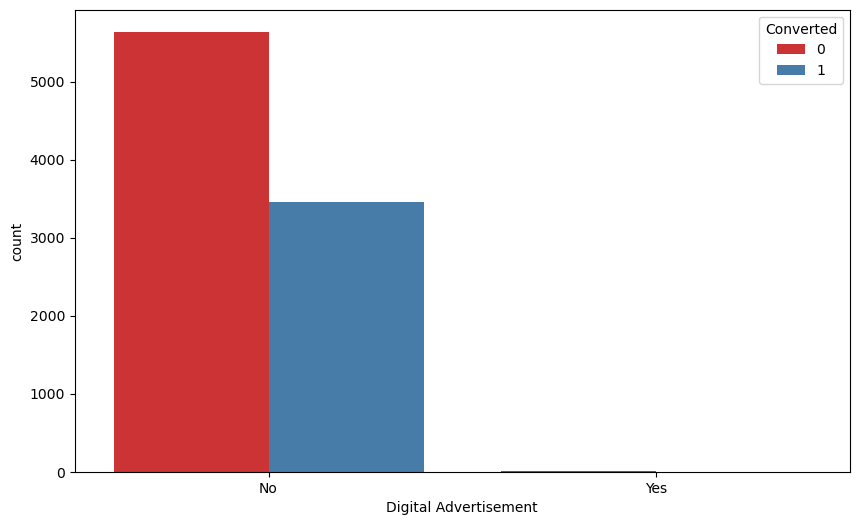

In [171]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
Target is more likely not to get converted.

<AxesSubplot:xlabel='Through Recommendations', ylabel='count'>

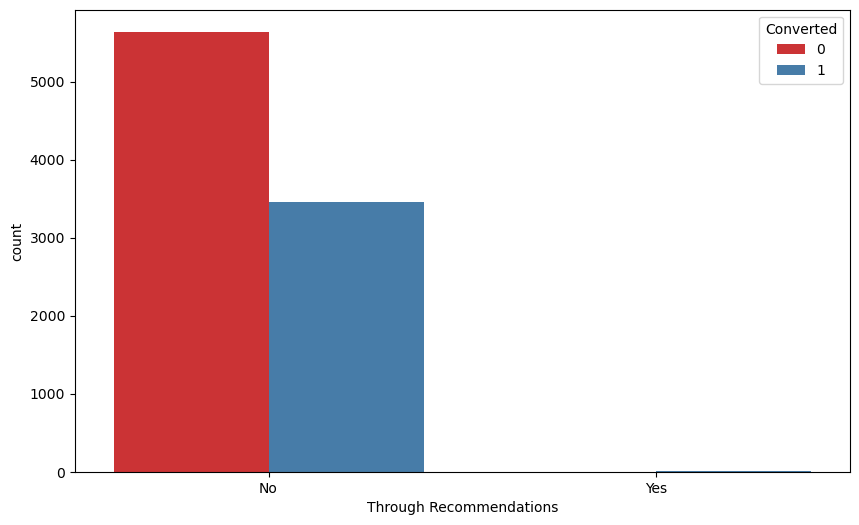

In [172]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The rate of convertion is very low.

<AxesSubplot:xlabel='Get updates on DM Content', ylabel='count'>

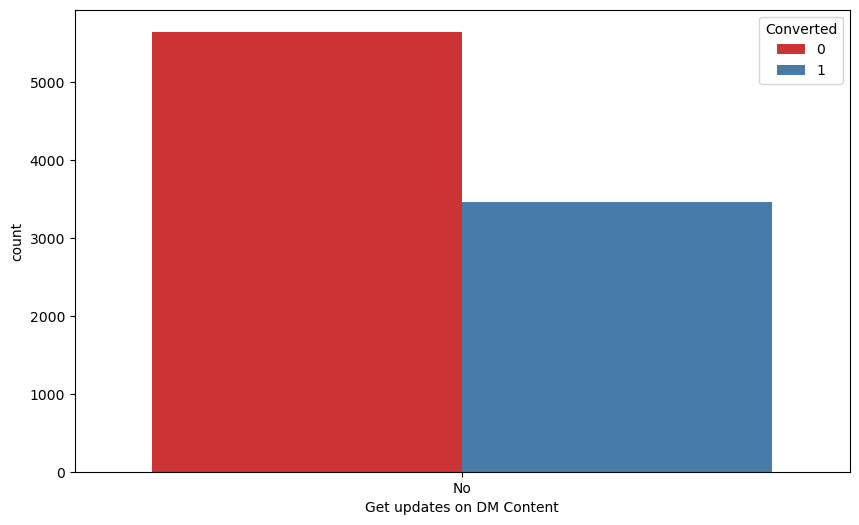

In [173]:
plt.figure(figsize = (10,6))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The target getting converted is low.

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

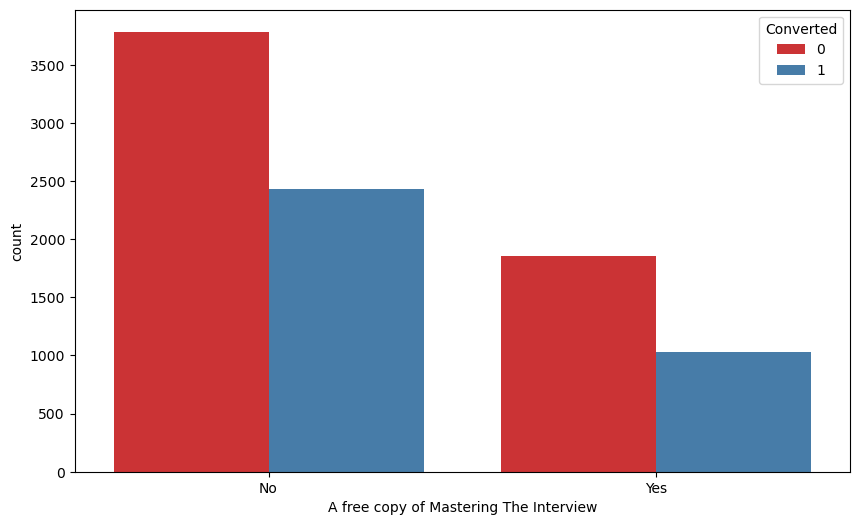

In [174]:
plt.figure(figsize = (10,6))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
Both the scenario of Yes and No, the target convertion is low.

<AxesSubplot:xlabel='X Education Forums', ylabel='count'>

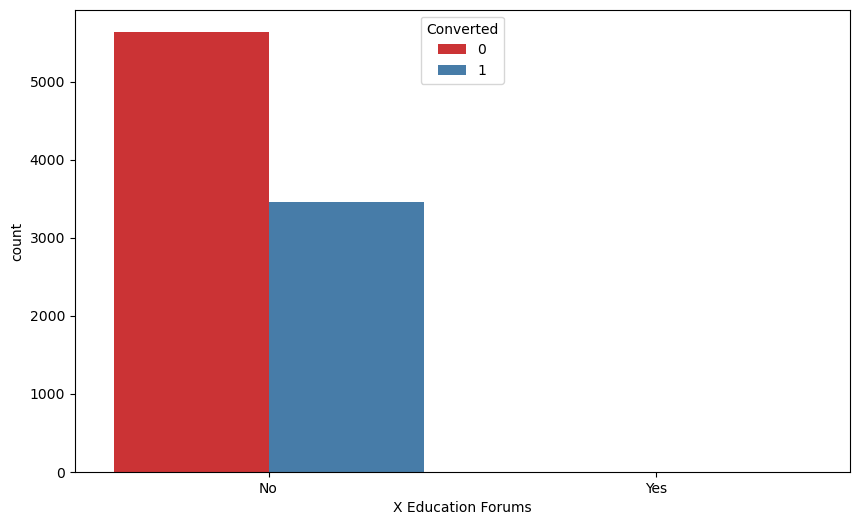

In [175]:
plt.figure(figsize = (10,6))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df,palette = 'Set1')

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

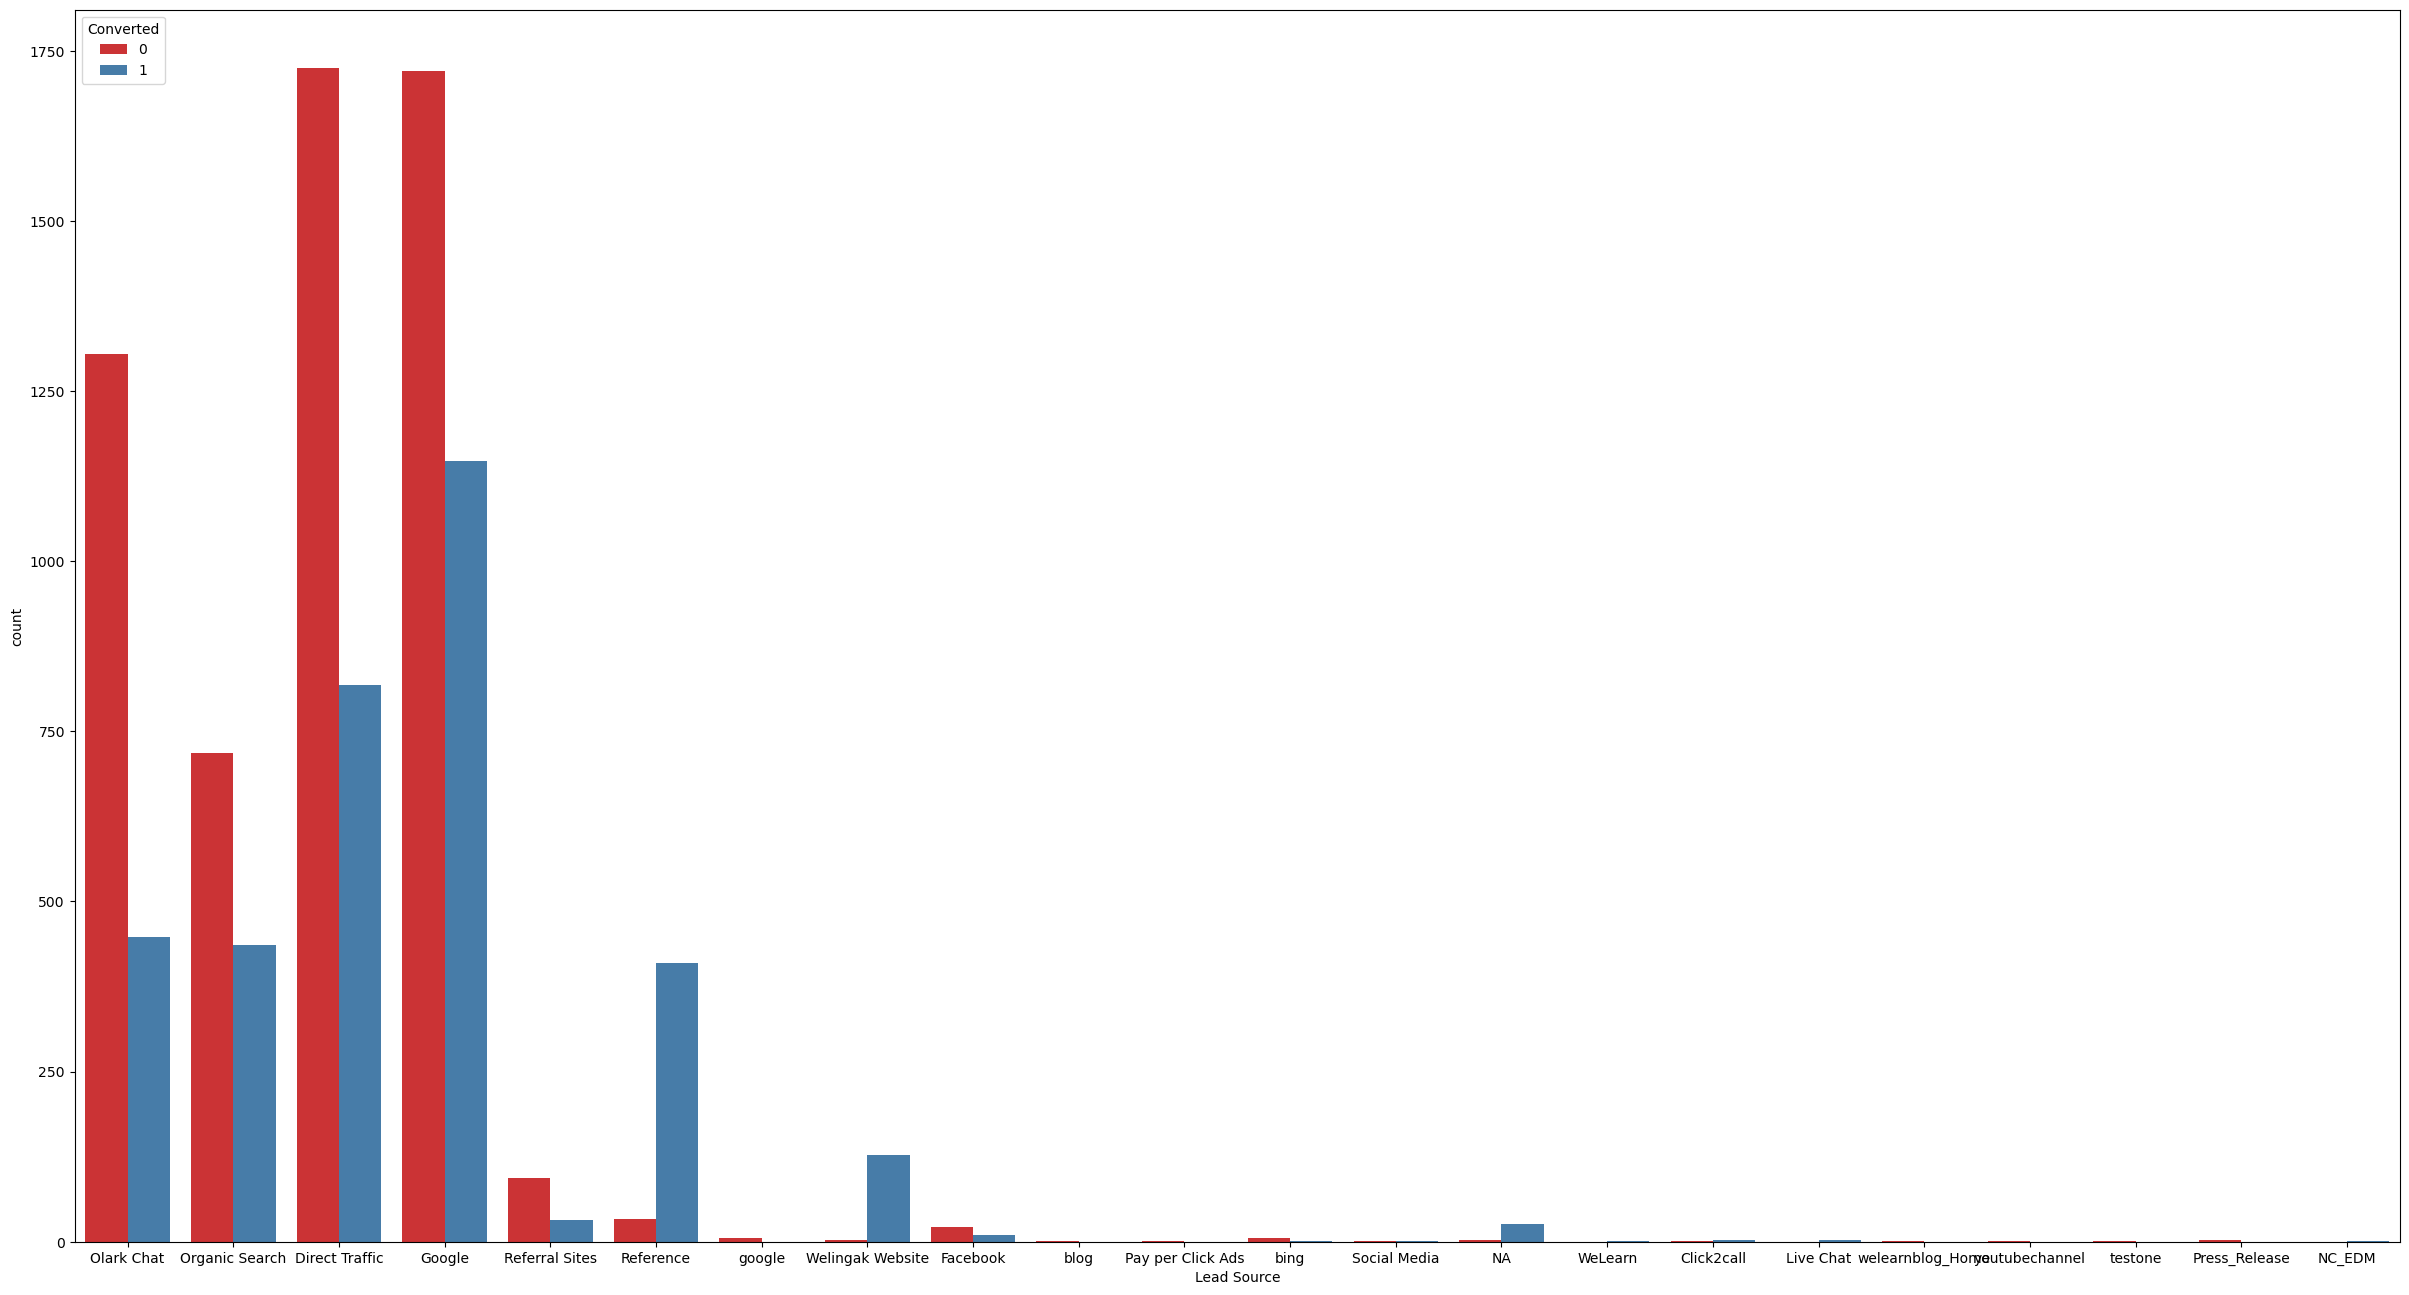

In [176]:
plt.figure(figsize = (30,16))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
Among all the variables, Google has the highest convertion rate.

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

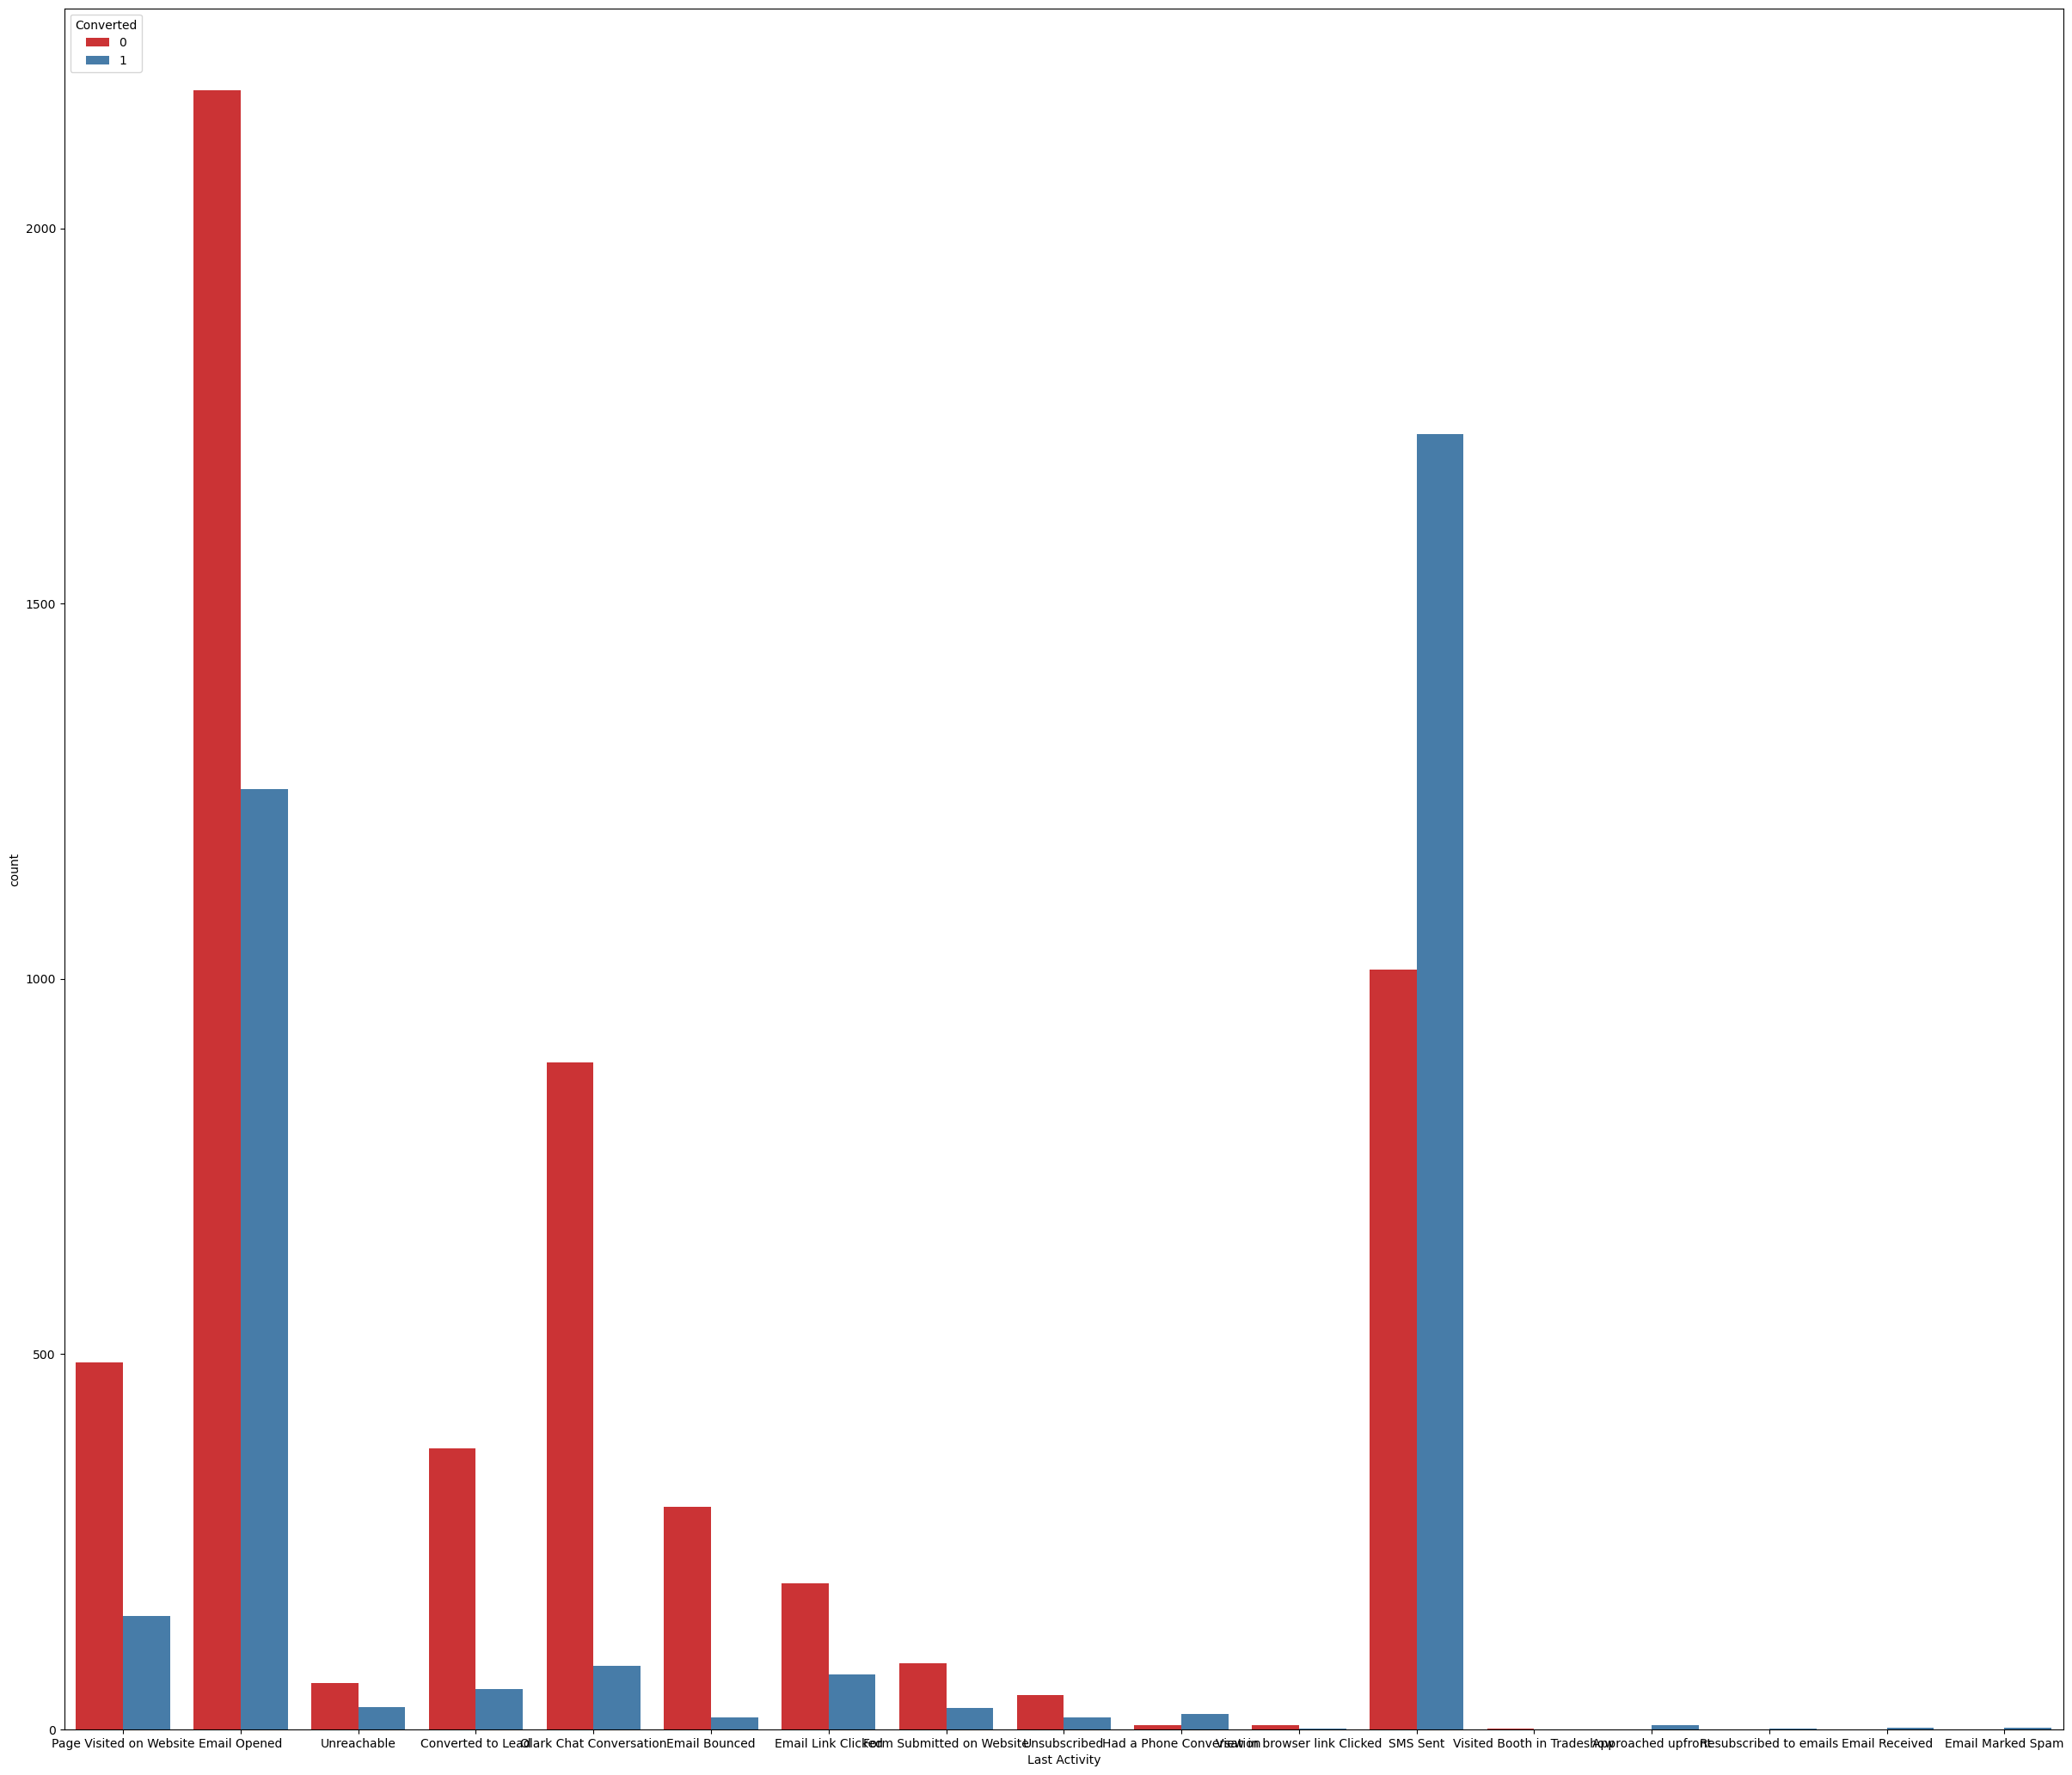

In [177]:
plt.figure(figsize = (30,26))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The variable SMS Sent has shown a positive convertion rate and is also the highest.

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='count'>

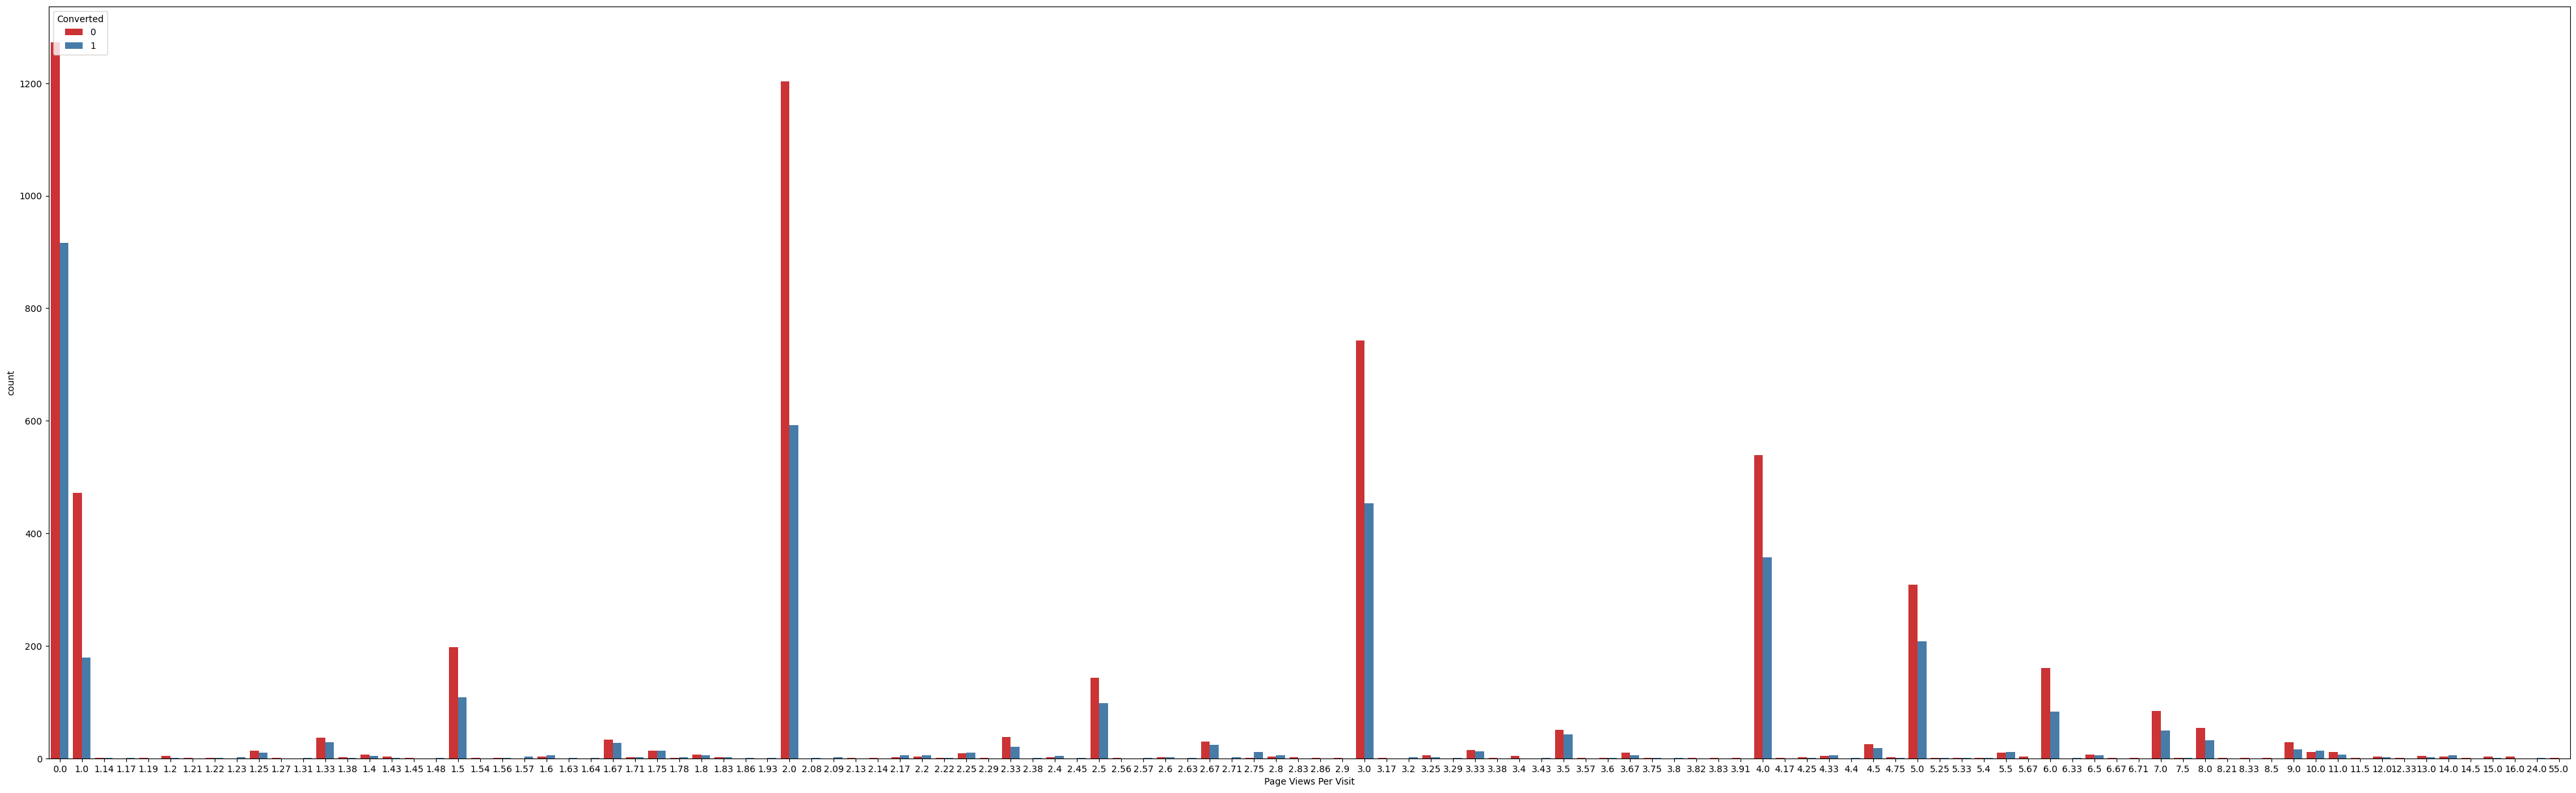

In [178]:
plt.figure(figsize = (50,15))
sns.countplot(x = "Page Views Per Visit", hue = "Converted", data = lead_df,palette = 'Set1')

<AxesSubplot:xlabel='TotalVisits', ylabel='count'>

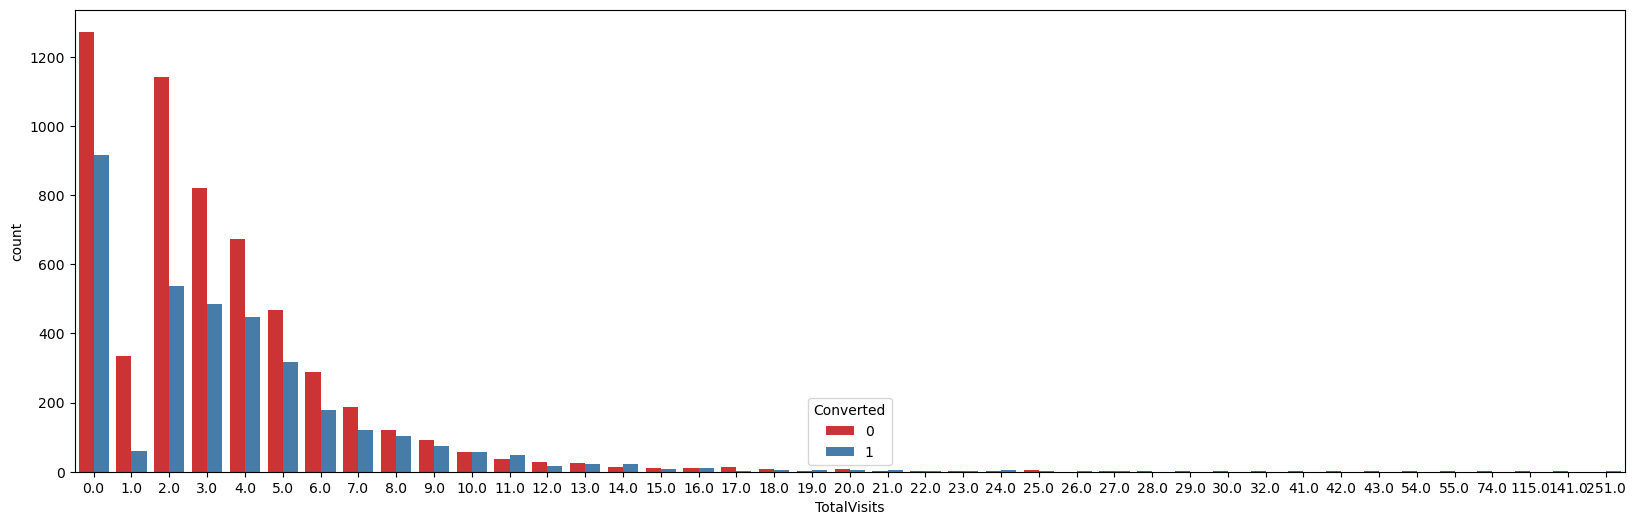

In [179]:
plt.figure(figsize = (20,6))
sns.countplot(x = "TotalVisits", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
0.0 has the highest convertion rate.

<AxesSubplot:xlabel='City', ylabel='count'>

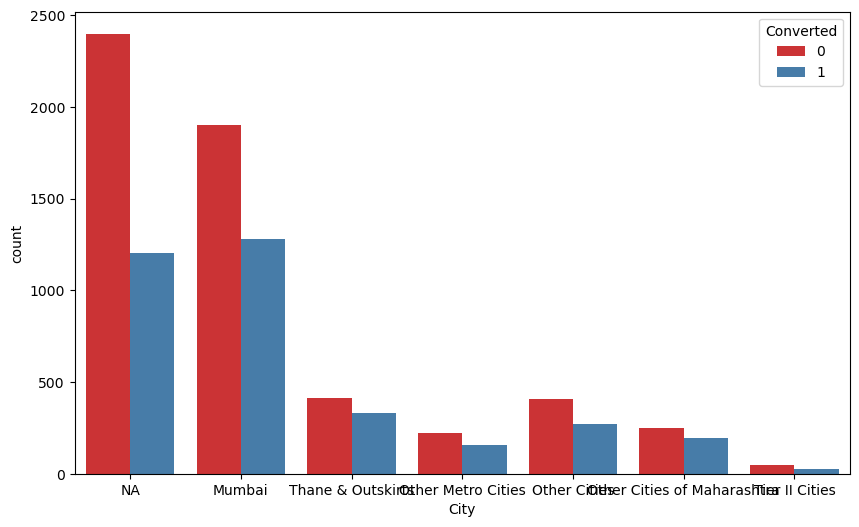

In [180]:
plt.figure(figsize = (10,6))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The target staying in Mumbai have the highest convertion rate.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

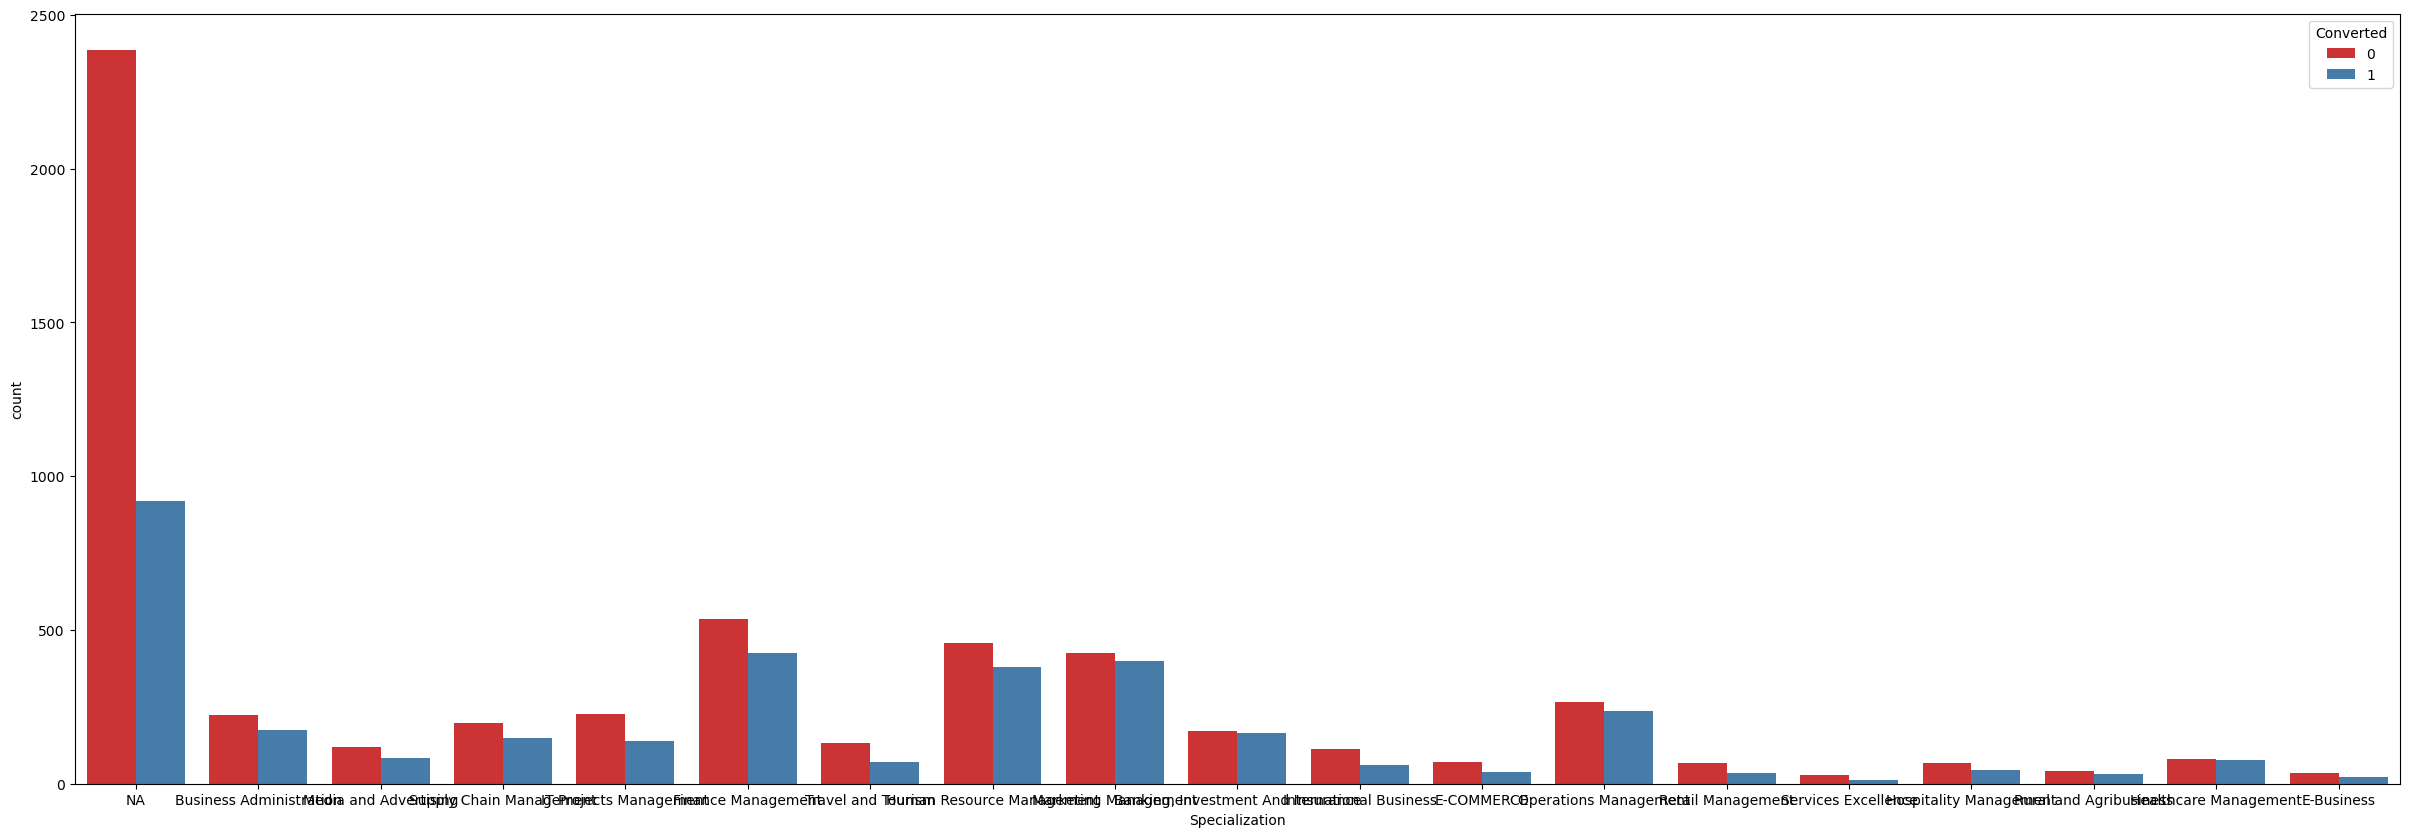

In [181]:
plt.figure(figsize = (30,10))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette = 'Set1')

<AxesSubplot:xlabel='Country', ylabel='count'>

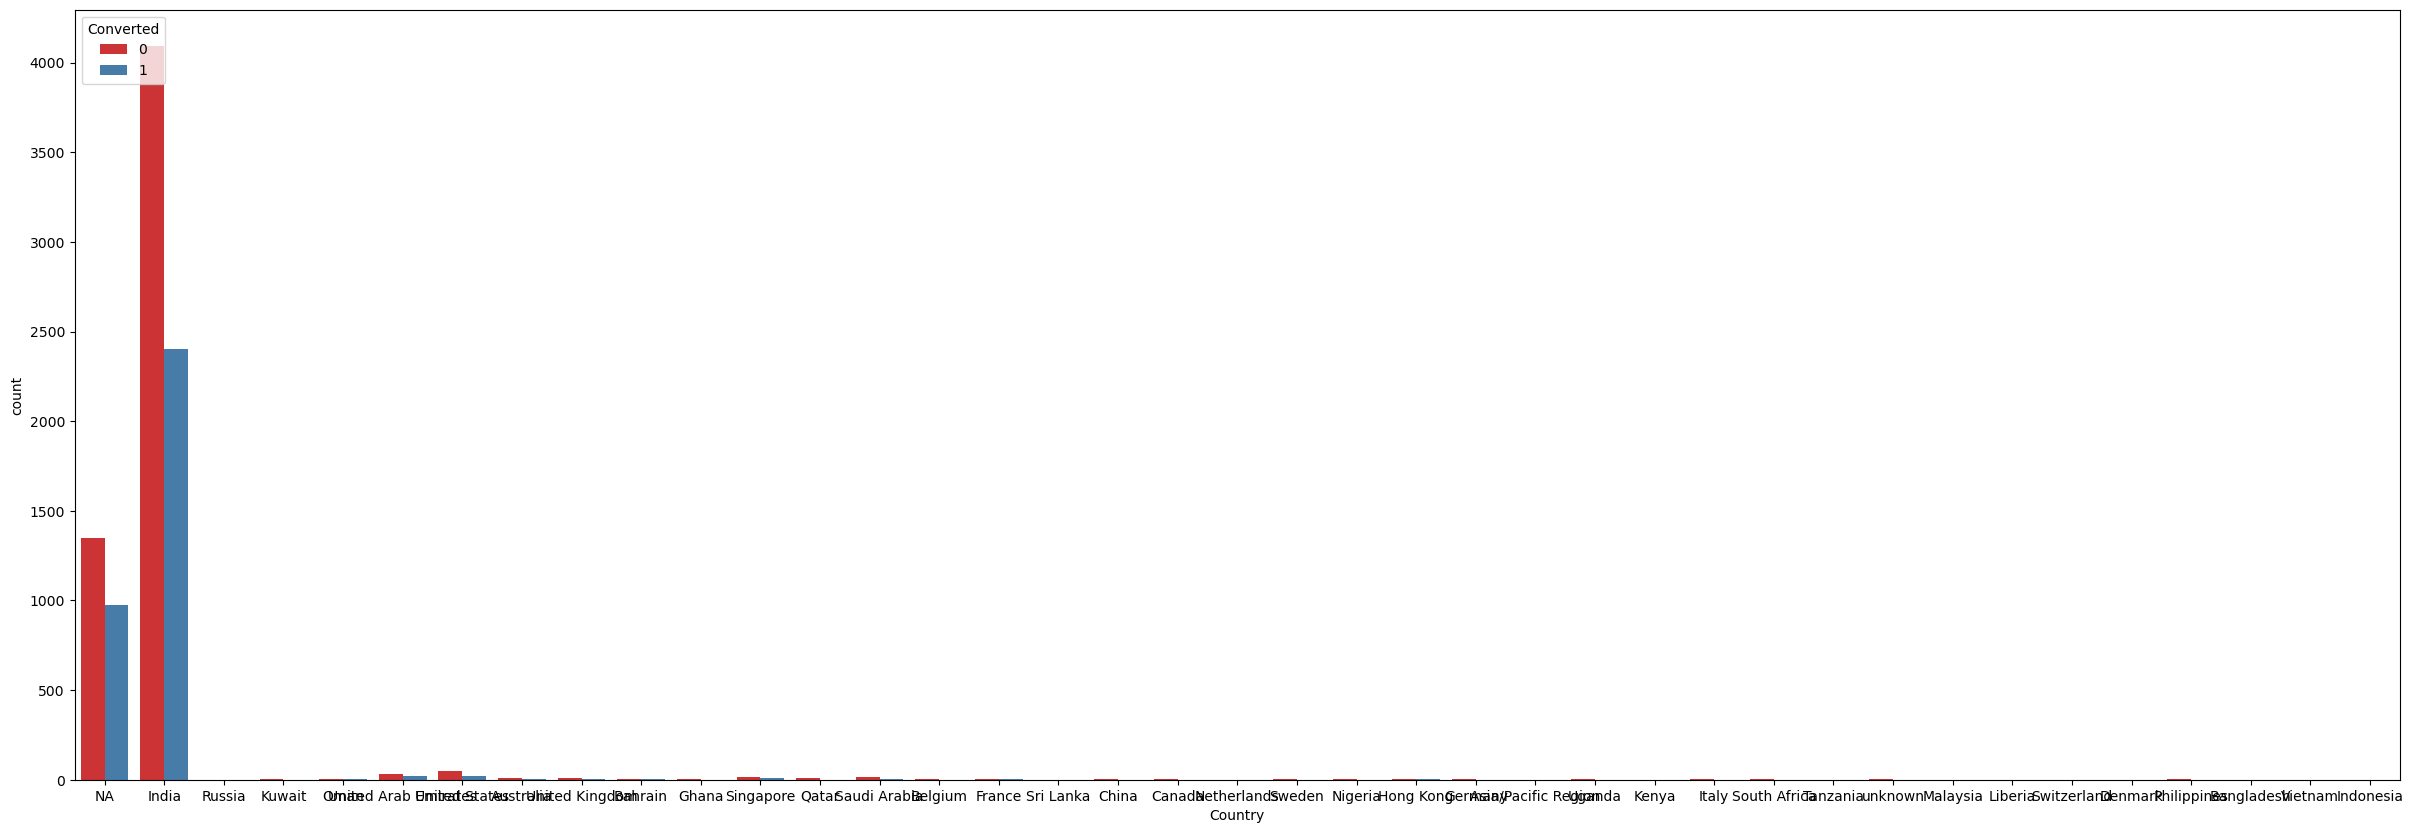

In [182]:
plt.figure(figsize = (30,10))
sns.countplot(x = "Country", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
Target in India are more likely to get converted.

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

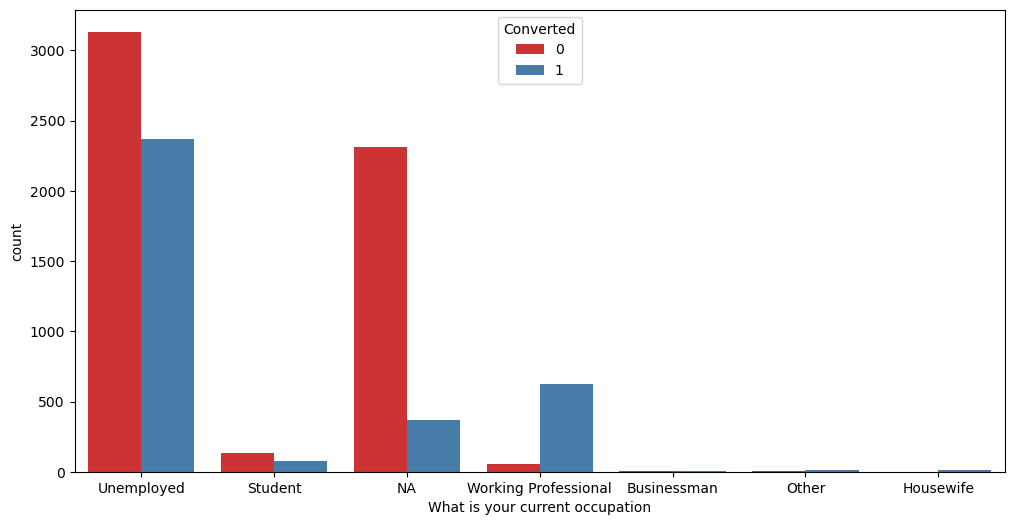

In [183]:
plt.figure(figsize = (12,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df,palette = 'Set1')

#### Observation
The Unemployed are more likely to get converted.

<AxesSubplot:xlabel='Lead Profile', ylabel='count'>

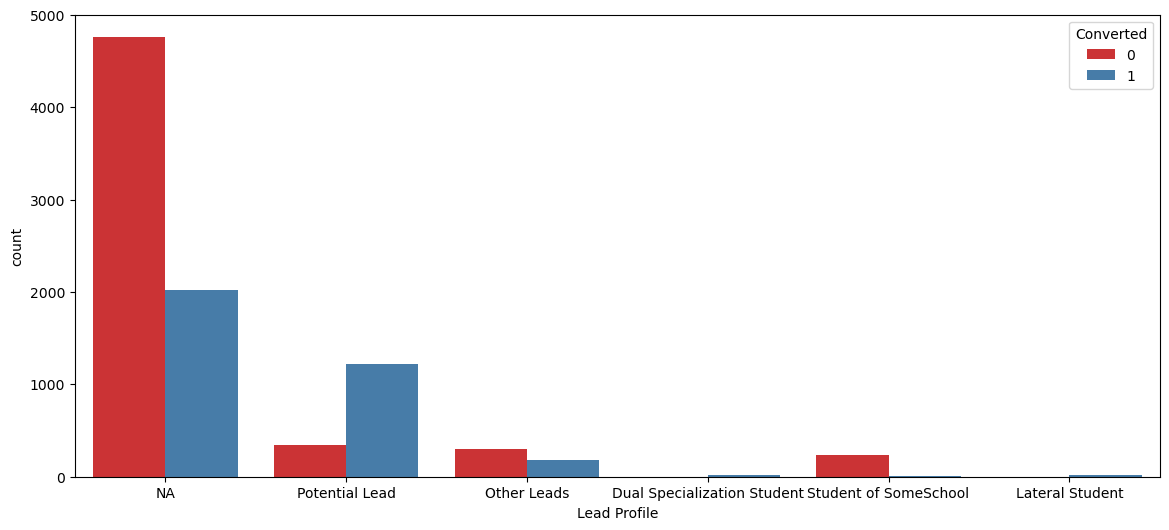

In [184]:
plt.figure(figsize = (14,6))
sns.countplot(x = "Lead Profile", hue = "Converted", data = lead_df,palette = 'Set1')

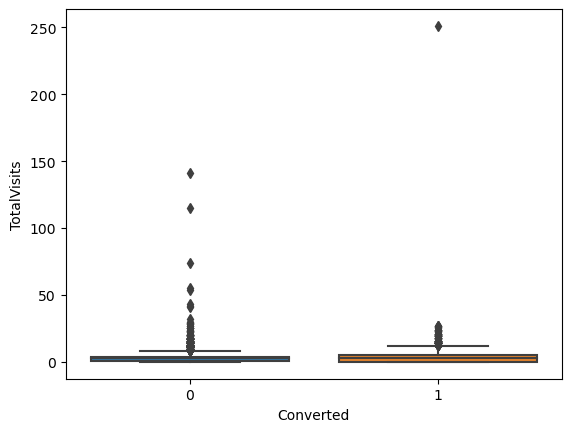

In [185]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

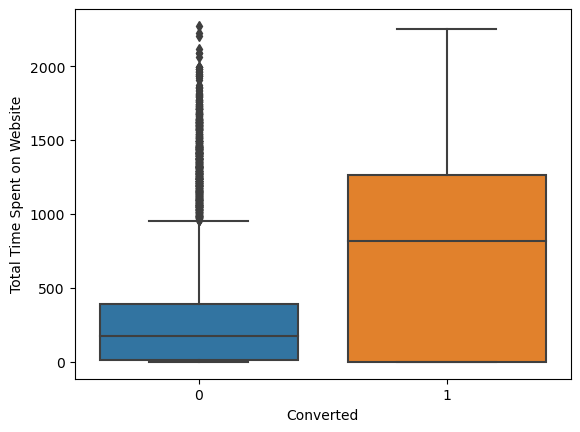

In [186]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

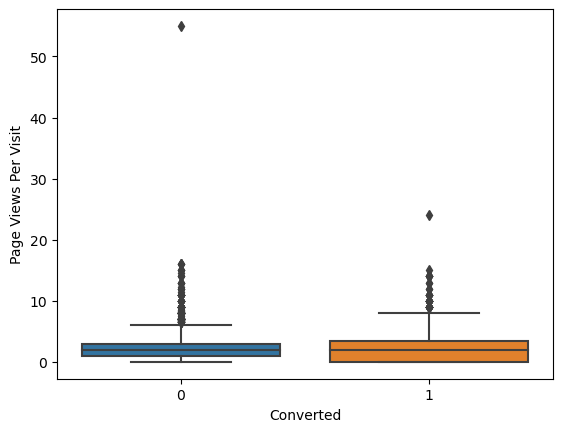

In [187]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.show()

 After analysing upto this much, it can be stated that some columns have no use in the further analysis.
 Lets, drop them.

In [188]:

lead_df.drop(["Search","Specialization", "Newspaper Article","X Education Forums","Newspaper", "Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview","Last Activity","Do Not Call","Last Notable Activity","City", "Country","Lead Number","Get updates on DM Content","Lead Profile"], axis = 1, inplace= True)

# 3. Data Preparation

In [189]:
# Checking the info of the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [190]:
# Checking the head of first 10 rows
lead_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed
5,API,Olark Chat,No,0,0.0,0,0.0,NA
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Unemployed
7,API,Olark Chat,No,0,0.0,0,0.0,NA
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,NA
9,API,Google,No,0,4.0,58,4.0,NA


In [191]:
# List of variables to map

varlist =  ["Do Not Email"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)


In [192]:
# Checking the head of first 10 rows again
lead_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed
5,API,Olark Chat,0,0,0.0,0,0.0,NA
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Unemployed
7,API,Olark Chat,0,0,0.0,0,0.0,NA
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,NA
9,API,Google,0,0,4.0,58,4.0,NA


In [193]:
# Checking the info again
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


In [194]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_df[['Lead Origin']], drop_first=True)
lead_df = pd.concat([lead_df,dummy],1)

dummy = pd.get_dummies(lead_df[['Lead Source']], drop_first=True)
lead_df = pd.concat([lead_df,dummy],1)

dummy = pd.get_dummies(lead_df[['What is your current occupation']], drop_first=True)
lead_df = pd.concat([lead_df,dummy],1)


In [195]:
# Checking the head again
lead_df.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,1,0,...,0,0,0,0,0,0,0,0,1,0
5,API,Olark Chat,0,0,0.0,0,0.0,NA,0,0,...,0,0,0,0,0,1,0,0,0,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Unemployed,1,0,...,0,0,0,0,0,0,0,0,1,0
7,API,Olark Chat,0,0,0.0,0,0.0,NA,0,0,...,0,0,0,0,0,1,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,NA,1,0,...,0,0,0,0,0,1,0,0,0,0
9,API,Google,0,0,4.0,58,4.0,NA,0,0,...,0,0,0,0,0,1,0,0,0,0


In [196]:
# Constract an array containing all catagorica
cat_cols= lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [197]:
#dropping the original columns after dummy variable creation

lead_df.drop(cat_cols,1,inplace = True)

In [198]:
# Checking the head again
lead_df.head(10)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,2.0,1640,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,2.0,71,2.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,4.0,58,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4. Test-Train Split

In [199]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [200]:
# Putting feature variable to X
X=lead_df.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [201]:
# Putting response variable to y
y = lead_df['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [202]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 5. Feature Scaling

In [203]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [204]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.092900,1.476324,-0.394072,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,0.695064,-0.771066,2.111481,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.301082,-0.571257,0.061483,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.074000,1.393834,0.517039,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


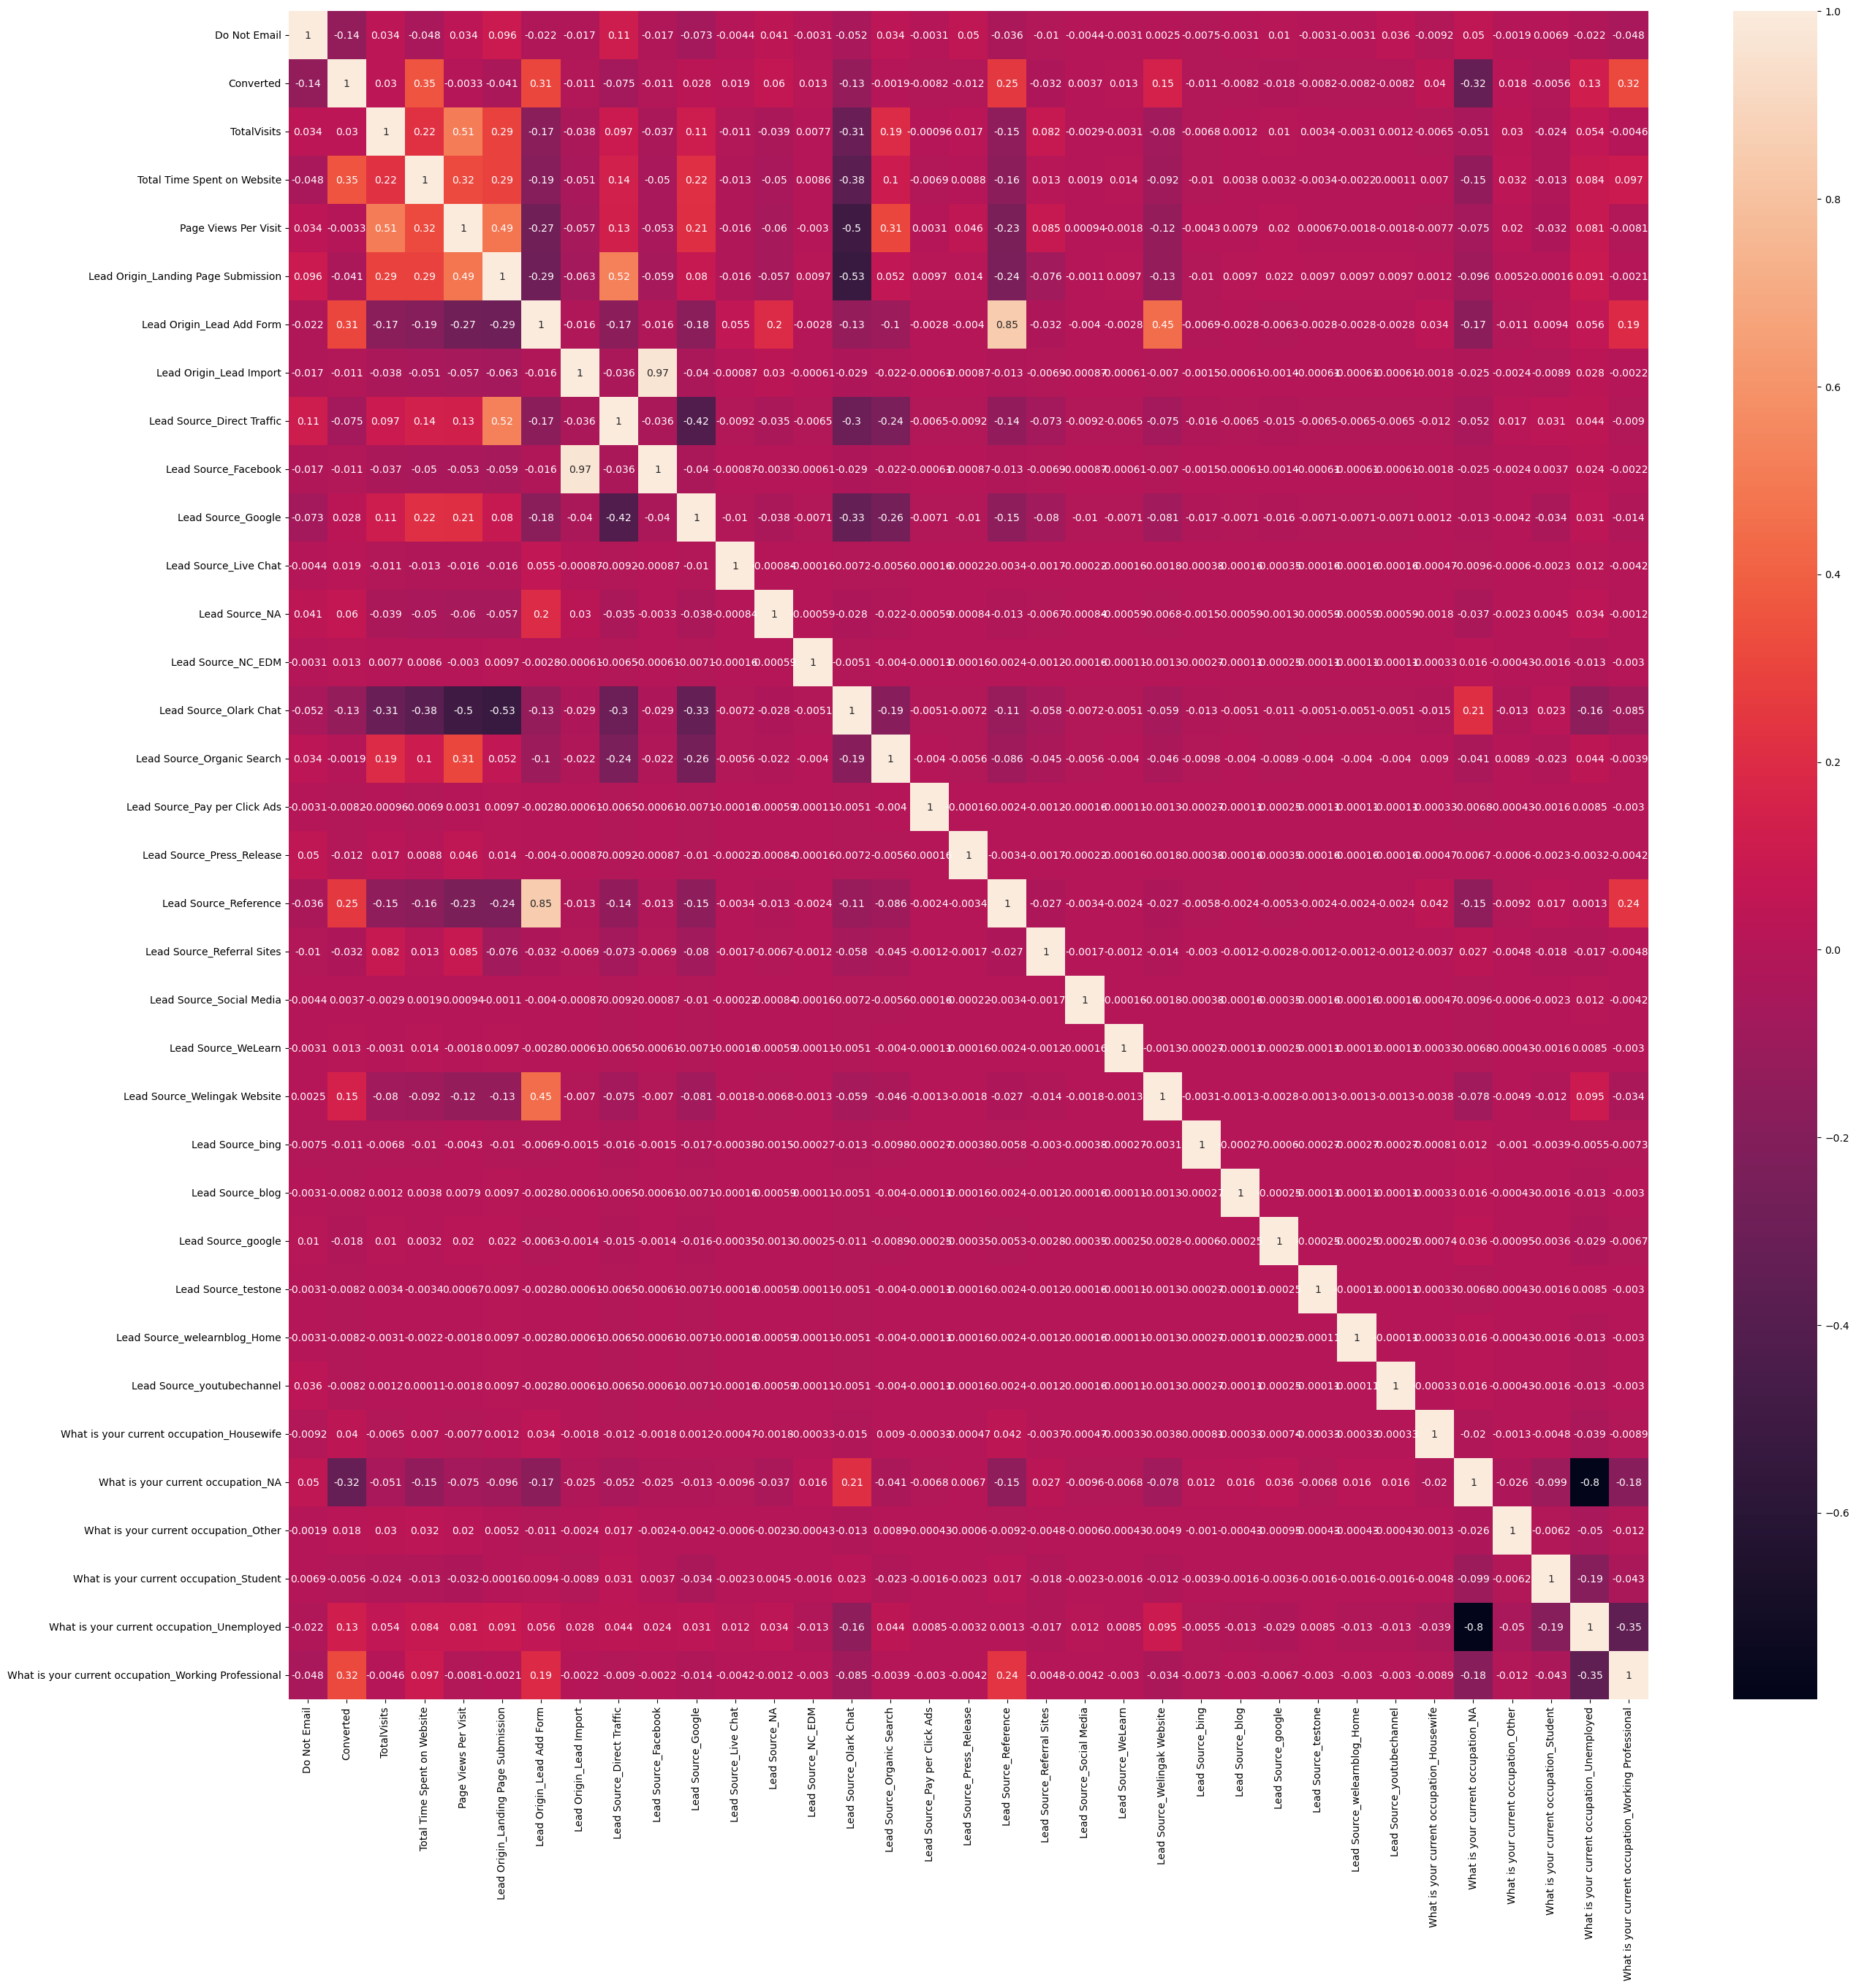

In [205]:
# Let's see the correlation matrix
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()


In [206]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   float64
 1   TotalVisits                                           6372 non-null   float64
 2   Total Time Spent on Website                           6372 non-null   float64
 3   Page Views Per Visit                                  6372 non-null   float64
 4   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 6   Lead Origin_Lead Import                               6372 non-null   uint8  
 7   Lead Source_Direct Traffic                            6372 non-null   uint8  
 8   Lead Source_Facebook                                  6

Dropping highly correlated dummy variables

In [207]:
X_test = X_test.drop(['What is your current occupation_NA','Lead Source_Olark Chat','Lead Origin_Lead Add Form','Lead Source_Reference', 'Lead Source_Facebook',],1)

In [208]:
X_train = X_train.drop(['What is your current occupation_NA','Lead Source_Olark Chat','Lead Origin_Lead Add Form','Lead Source_Reference', 'Lead Source_Facebook',],1)

# 6. Model Building

In [209]:
# importing necessary library
import statsmodels.api as sm

In [210]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [211]:
rfe.support_

array([False, False,  True, False, False, False,  True,  True,  True,
        True, False,  True, False, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True])

In [212]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NA', True, 1),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 4),
 ('Lead Source_Press_Release', False, 15),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 7),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 2),
 ('Lead Source_welearnblog_Home', False, 9),
 ('Lead Source_youtubechannel', False, 11),
 ('What is your current occupation_Housewife', True, 1),
 ('What is you

In [213]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NA',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_google', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [214]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_NC_EDM', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel'],
      dtype='object')

MODEL 1

In [215]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Sun, 13 Aug 2023   Deviance:                       6036.1
Time:                        21:47:22   Pearson chi2:                 6.34e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3165
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8390      0.088     -9.586      0.000      -1.011      -0.667
Total Time Spent on Website                              1.1120      0.039     28.871      0.000       1.037       1.188
Lead Source_Direct Traffic                              -1.6501      0.100    -16.561      0.000      -1.845      -1.455
Lead Source_Google                                      -1.3064      0.095    -13.699      0.000      -1.493      -1.119
Lead Source_Live Chat                                   23.8813   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NA                                           3.0381      1.035      2.937      0.003       1.010       5.066
Lead Source_Organic Search                              -1.4415      0.117    -12.291      0.000      -1.671      -1.212
Lead Source_Referral Sites                              -1.8665      0.335     -5.567      0.000      -2.524      -1.209
Lead Source_Welingak Website                             4.1322      0.718      5.757      0.000       2.725       5.539
Lead Source_bing                                       -23.0901   3.89e+04     -0.001      1.000   -7.63e+04    7.63e+04
Lead Source_google                                     -23.3663   4.22e+04     -0.001      1.000   -8.26e+04    8.26e+04
What is your current occupation_Housewife               25.3039    2.7e+04      0.001      0.999   -5.29e+04    5.29e+04
What is your current occupation_Other                    1.4526      0.652      2.229      0.026       0.176       2.730
What is your current occupation_Student                  1.3537      0.212      6.396      0.000       0.939       1.769
What is your current occupation_Unemployed               1.5035      0.081     18.465      0.000       1.344       1.663
What is your current occupation_Working Professional     4.1614      0.183     22.714      0.000       3.802       4.521
========================================================================================================================
"""

p-value of variable 'Lead Source_Live Chat' is high, so we can drop it.

In [216]:
#dropping column with high p-value

col = col.drop('Lead Source_Live Chat',1)

MODEL 2

In [217]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.8
Date:                Sun, 13 Aug 2023   Deviance:                       6039.6
Time:                        21:47:23   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3161
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8363      0.087     -9.560      0.000      -1.008      -0.665
Total Time Spent on Website                              1.1119      0.039     28.867      0.000       1.036       1.187
Lead Source_Direct Traffic                              -1.6544      0.100    -16.611      0.000      -1.850      -1.459
Lead Source_Google                                      -1.3107      0.095    -13.750      0.000      -1.498      -1.124
Lead Source_NA                                           3.0334      1.035      2.932      0.003       1.006       5.061
Lead Source_Organic Search                              -1.4459      0.117    -12.332      0.000      -1.676      -1.216
Lead Source_Referral Sites                              -1.8708      0.335     -5.580      0.000      -2.528      -1.214
Lead Source_Welingak Website                             4.1273      0.718      5.751      0.000       2.721       5.534
Lead Source_bing                                       -22.0941   2.36e+04     -0.001      0.999   -4.63e+04    4.62e+04
Lead Source_google                                     -22.3690   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
What is your current occupation_Housewife               24.3051   1.64e+04      0.001      0.999   -3.21e+04    3.21e+04
What is your current occupation_Other                    1.4539      0.652      2.232      0.026       0.177       2.731
What is your current occupation_Student                  1.3536      0.212      6.395      0.000       0.939       1.768
What is your current occupation_Unemployed               1.5056      0.081     18.494      0.000       1.346       1.665
What is your current occupation_Working Professional     4.1618      0.183     22.715      0.000       3.803       4.521
========================================================================================================================
"""

p-value of variable 'Lead Source_bing' is high, so we can drop it.

In [218]:
#dropping column with high p-value

col = col.drop('Lead Source_bing',1)

MODEL 3

In [219]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.7
Date:                Sun, 13 Aug 2023   Deviance:                       6043.4
Time:                        21:47:45   Pearson chi2:                 6.35e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3157
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8428      0.087     -9.642      0.000      -1.014      -0.671
Total Time Spent on Website                              1.1113      0.039     28.860      0.000       1.036       1.187
Lead Source_Direct Traffic                              -1.6483      0.100    -16.561      0.000      -1.843      -1.453
Lead Source_Google                                      -1.3045      0.095    -13.696      0.000      -1.491      -1.118
Lead Source_NA                                           3.0385      1.035      2.937      0.003       1.011       5.066
Lead Source_Organic Search                              -1.4398      0.117    -12.286      0.000      -1.669      -1.210
Lead Source_Referral Sites                              -1.8645      0.335     -5.562      0.000      -2.522      -1.208
Lead Source_Welingak Website                             4.1326      0.718      5.758      0.000       2.726       5.539
Lead Source_google                                     -22.3620   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
What is your current occupation_Housewife               24.3061   1.64e+04      0.001      0.999   -3.21e+04    3.21e+04
What is your current occupation_Other                    1.4553      0.651      2.234      0.025       0.178       2.732
What is your current occupation_Student                  1.3563      0.212      6.409      0.000       0.942       1.771
What is your current occupation_Unemployed               1.5063      0.081     18.505      0.000       1.347       1.666
What is your current occupation_Working Professional     4.1638      0.183     22.729      0.000       3.805       4.523
========================================================================================================================
"""

p-value of variable 'What is your current occupation_Housewife' is high, so we can drop it.

In [220]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

MODEL 4

In [222]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3033.9
Date:                Sun, 13 Aug 2023   Deviance:                       6067.8
Time:                        21:48:28   Pearson chi2:                 6.36e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3131
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8197      0.087     -9.440      0.000      -0.990      -0.649
Total Time Spent on Website                              1.1108      0.038     28.903      0.000       1.035       1.186
Lead Source_Direct Traffic                              -1.6442      0.099    -16.550      0.000      -1.839      -1.449
Lead Source_Google                                      -1.2980      0.095    -13.660      0.000      -1.484      -1.112
Lead Source_NA                                           3.0430      1.035      2.941      0.003       1.015       5.071
Lead Source_Organic Search                              -1.4270      0.117    -12.213      0.000      -1.656      -1.198
Lead Source_Referral Sites                              -1.8657      0.335     -5.571      0.000      -2.522      -1.209
Lead Source_Welingak Website                             4.1371      0.718      5.764      0.000       2.730       5.544
Lead Source_google                                     -21.3840   1.55e+04     -0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Other                    1.4269      0.651      2.191      0.028       0.151       2.703
What is your current occupation_Student                  1.3293      0.211      6.289      0.000       0.915       1.744
What is your current occupation_Unemployed               1.4782      0.081     18.316      0.000       1.320       1.636
What is your current occupation_Working Professional     4.1361      0.183     22.619      0.000       3.778       4.494
========================================================================================================================
"""

p-value of variable 'Lead Source_google' is high, so we can drop it.

In [223]:
#dropping column with high p-value

col = col.drop('Lead Source_google',1)

MODEL 5

In [225]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3035.8
Date:                Sun, 13 Aug 2023   Deviance:                       6071.6
Time:                        21:49:52   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3126
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8306      0.087     -9.581      0.000      -1.001      -0.661
Total Time Spent on Website                              1.1080      0.038     28.882      0.000       1.033       1.183
Lead Source_Direct Traffic                              -1.6367      0.099    -16.496      0.000      -1.831      -1.442
Lead Source_Google                                      -1.2903      0.095    -13.597      0.000      -1.476      -1.104
Lead Source_NA                                           3.0460      1.035      2.944      0.003       1.018       5.074
Lead Source_Organic Search                              -1.4195      0.117    -12.161      0.000      -1.648      -1.191
Lead Source_Referral Sites                              -1.8580      0.335     -5.551      0.000      -2.514      -1.202
Lead Source_Welingak Website                             4.1402      0.718      5.769      0.000       2.734       5.547
What is your current occupation_Other                    1.4331      0.651      2.202      0.028       0.157       2.709
What is your current occupation_Student                  1.3354      0.211      6.319      0.000       0.921       1.750
What is your current occupation_Unemployed               1.4837      0.081     18.378      0.000       1.325       1.642
What is your current occupation_Working Professional     4.1411      0.183     22.649      0.000       3.783       4.499
========================================================================================================================
"""

Since the Model 5 seems to be stable with significant p-values, we consider it and go ahead with this model for further analysis.

Calculating VIF

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.29
2,Lead Source_Google,1.63
1,Lead Source_Direct Traffic,1.57
4,Lead Source_Organic Search,1.27
10,What is your current occupation_Working Profes...,1.12
0,Total Time Spent on Website,1.10
6,Lead Source_Welingak Website,1.06
8,What is your current occupation_Student,1.04
5,Lead Source_Referral Sites,1.02
3,Lead Source_NA,1.01


All VIF is less than 5. So we need not drop any more variables and we can proceed with making predictions using this model.

# 7. Prediction

In [227]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.730765
5520    0.137292
1962    0.219228
1566    0.972469
9170    0.419905
5097    0.141022
8954    0.236166
309     0.253648
5519    0.141022
1050    0.645288
dtype: float64

In [228]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73076507, 0.13729163, 0.21922819, 0.97246881, 0.41990549,
       0.14102231, 0.23616562, 0.25364769, 0.14102231, 0.64528828])

In [229]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.730765,7962
1,0,0.137292,5520
2,0,0.219228,1962
3,1,0.972469,1566
4,0,0.419905,9170


In [230]:
# Consider a cutoff = 0.5 for prediction
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.730765,7962,1
1,0,0.137292,5520,0
2,0,0.219228,1962,0
3,1,0.972469,1566,1
4,0,0.419905,9170,0


# 8. Evaluation

In [231]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3530  423]
 [1035 1384]]


In [232]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7711864406779662


In [233]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [234]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5721372467961968

In [235]:
# Let us calculate specificity
TN / float(TN+FP)

0.8929926637996458

In [236]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10700733620035416


In [250]:
# Calculate True Postive Rate  TP/TP+FN
print(TP/ float(TP+FN))

0.5721372467961968


PLOTTING ROC CURVE

In [239]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [240]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

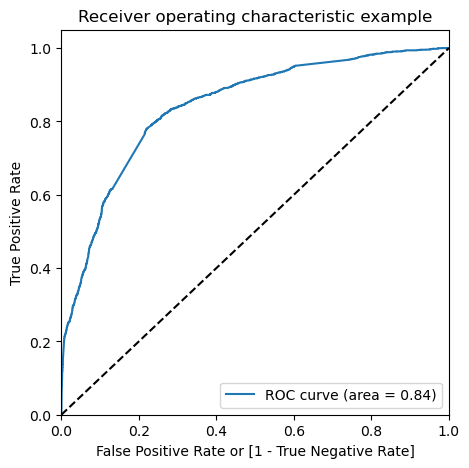

In [241]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Here We got, ROC Curve area = 0.84, closer to 1, which indicates a good model

Optimal Cutoff Point Finding

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.730765,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.137292,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.219228,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.972469,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.419905,9170,0,1,1,1,1,1,0,0,0,0,0


In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.499215  0.981811  0.203896
0.2   0.2  0.685028  0.899132  0.554010
0.3   0.3  0.763497  0.825134  0.725778
0.4   0.4  0.779661  0.776767  0.781432
0.5   0.5  0.771186  0.572137  0.892993
0.6   0.6  0.753610  0.489458  0.915254
0.7   0.7  0.733836  0.400579  0.937769
0.8   0.8  0.712963  0.291029  0.971161
0.9   0.9  0.693974  0.205870  0.992664


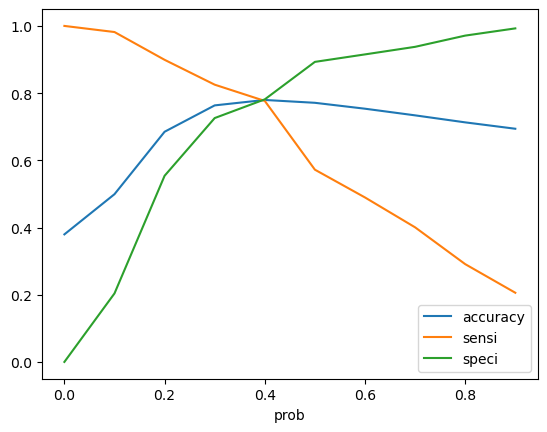

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.45 is the cutoff point to take.

In [245]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.730765,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.137292,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.219228,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.972469,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.419905,9170,0,1,1,1,1,1,0,0,0,0,0,1


In [246]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.730765,7962,1,73
1,0,0.137292,5520,0,14
2,0,0.219228,1962,0,22
3,1,0.972469,1566,1,97
4,0,0.419905,9170,1,42


In [248]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1996
0     423
Name: final_Predicted, dtype: int64

In [249]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

In [252]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2869, 1084],
       [ 423, 1996]], dtype=int64)

In [253]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [254]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.8251343530384456

In [255]:
# Let us calculate specificity
TN / float(TN+FP)


0.7257778902099671

In [256]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.27422210979003286


In [257]:
# Calculate True Postive Rate  
print(TP/ float(TP+FN))

0.8251343530384456


In [258]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7711864406779662


In [259]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6480519480519481

In [260]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8251343530384456

So, Our model got approximately 83 % prediction of conversion correctly on Train dataset.

Inference:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

Accuracy : 77.12%
Sensitivity :82.51%
Specificity : 72.57%
True Postive Rate : 82.51%
False Postive Rate : 27.42%
Precision : 64.80%
Recall : 82.51%



# 9. Predictions on the test dataset

In [261]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NA,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.089406,-0.108519,0.308788,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-0.788357,-0.888077,-1.133359,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.322390,0.420993,-0.171928,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.143578,-0.110357,0.789504,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,0.842530,-0.433947,-0.292107,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [262]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_NA,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.108519,0,0,0,1,0,0,0,0,1,0
4050,-0.888077,0,0,0,0,0,0,0,0,1,0
7201,0.420993,1,0,0,0,0,0,0,0,1,0
1196,-0.110357,0,0,0,1,0,0,0,0,1,0
8219,-0.433947,1,0,0,0,0,0,0,0,1,0


In [263]:
X_test_sm = sm.add_constant(X_test)

In [264]:
X_test_sm.shape

(2731, 12)

In [265]:
y_test_pred = res.predict(X_test_sm) 

In [266]:
y_test_pred[:10]

3504    0.291783
4050    0.418011
7201    0.373509
1196    0.291362
8219    0.187788
8747    0.140082
9048    0.574005
6524    0.219117
7693    0.158670
8187    0.418011
dtype: float64

In [267]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [268]:
# Let's see the head
y_pred_1.head()

,0
3504,0.291783
4050,0.418011
7201,0.373509
1196,0.291362
8219,0.187788


In [269]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [270]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [271]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [272]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [273]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.291783
1,1,4050,0.418011
2,0,7201,0.373509
3,0,1196,0.291362
4,1,8219,0.187788


In [274]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [275]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.291783
1,1,4050,0.418011
2,0,7201,0.373509
3,0,1196,0.291362
4,1,8219,0.187788


In [276]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [277]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.291783,29
1,4050,1,0.418011,42
2,7201,0,0.373509,37
3,1196,0,0.291362,29
4,8219,1,0.187788,19


In [278]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [279]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.291783,29,0
1,4050,1,0.418011,42,1
2,7201,0,0.373509,37,1
3,1196,0,0.291362,29,0
4,8219,1,0.187788,19,0


In [280]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    857
0    185
Name: final_Predicted, dtype: int64

In [281]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

So, Our model got approximately 83 % prediction of conversion correctly on Test dataset also.

In [282]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7682167704137679

In [283]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1241,  448],
       [ 185,  857]], dtype=int64)

In [284]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [285]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8224568138195777

In [286]:
# Let us calculate specificity
TN / float(TN+FP)

0.7347542924807579

In [287]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

0.7682167704137679


In [288]:
# Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6567049808429118

In [289]:
# Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8224568138195777

In [290]:
# Calculate True Postive Rate  
print(TP/ float(TP+FN))



0.8224568138195777


In [291]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.26524570751924215


Inference:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 76.82%

Sensitivity :82.24%

Specificity : 73.47%

Precision : 65.67%

Recall : 82.24%

True Postive Rate : 82.24%

False Postive Rate : 26.52%

# <b><font size =4>Conclusion:</font></b>

Important features responsible for good conversion rate of a lead are as follows :

# 1. Lead Source_Welingak Website
 # 2. What is your current occupation_Working Professional